# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# for making the Python code more structured automatically (good coding practice)
!pip install black[jupyter] --quiet
from google.colab import drive
drive.mount("/content/drive")



# for reading and manipulation data
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# for splitting the data into train and test
from sklearn.model_selection import train_test_split

# for building linear regression_model
import statsmodels.api as sm

# for check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.1 MB/s eta 0:00:00
Mounted at /content/drive


## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Greatlearning/used_device_data.csv')

## Data Overview

- Observations
- Sanity checks

### Displaying the first few rows of the dataset

In [ ]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


### Observations
* The dataset is properly uploaded.
* No missing values shown in the first five rows but we will check if the remaining rows have missing values.

In [ ]:
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


### Observations
* The dataset is properly uploaded.
* There is missing data in main camera cloumn, we will properly check for all the missing values.

### Checking the shape of the dataset

In [ ]:
data.shape

(3454, 15)

### Observations
* The dataset has 3454 rows and 15 columns

### Checking the data type of different columns of the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

### Observations
* The dataset contains 11 numerical variables(float = 9, int = 2) 4 categorical(object type) variables.
* The memory used by the dataset is 404.9KB.
* Some columns contain missing values because they have less than 3454 non-null counts.

### Statistical summary of the dataset

In [ ]:
# check for data summary
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


### Observations
* There are 34 unique brand names of the used devices and ram size is between 0.02GB and 12GB.
* The mean screen size of the used devices is 13.7 with minimum size of 5.08cm and maximum size of 30.71cm.
* The internal memories of the used devices range from 0.01GB to 1024GB.
* The average normalized price of the used devices is approximately 4.36 euros while the average normalized price of the new devices is approximately 5.23 euros.
* The oldest used device was released in 2013 while the latest used device was released in 2020.

### Checking for duplicate values

In [ ]:
# check for duplicated values
data.duplicated().sum()

0

### Observation
* There are no duplicate values in the data.

### Checking missing values

In [ ]:
# check for missing values
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

### Observations
* There are missing values in the dataset

In [ ]:
# Create a copy of the data
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate data analysis

#### Exploring the distribution of the numerical variables


screen_size,
main_camera_mp,
selfie_camera_mp,
int_memory,
ram,
battery,
weight,
release_year,
days_used,
normalized_used_price,
normalized_new_price

<a name='link1'> explore the data with missing values

In [ ]:
# create code to explore univariate data using both boxplot and histplot
def boxplot_histplot(column_name):
    """
    Boxplot and histogram combined to explore univariate analysis

    column_name: dataframe column which contains the variable to be analyzed
    figsize: size of figure (default (15,10))
    """

    # Create boxplot
    plt.figure(figsize = (15,10) )
    sns.boxplot(
        data = df,
        x = column_name,
        showmeans = True,
    )
    plt.title(f'Boxplot: {column_name}')
    plt.xlabel(f'{column_name}')
    plt.show()

    # Create histogram
    plt.figure(figsize = (15,10) )
    plt.title(f'Histogram: {column_name}')
    plt.xlabel(f'{column_name}')
    sns.histplot(data = df, x = column_name)
    mean = df[column_name].mean()
    median = df[column_name].median()
    plt.axvline(x=mean, color='red', linestyle='--', label='Mean')
    plt.axvline(x=median, color='green', linestyle='--', label='Median')
    plt.show()

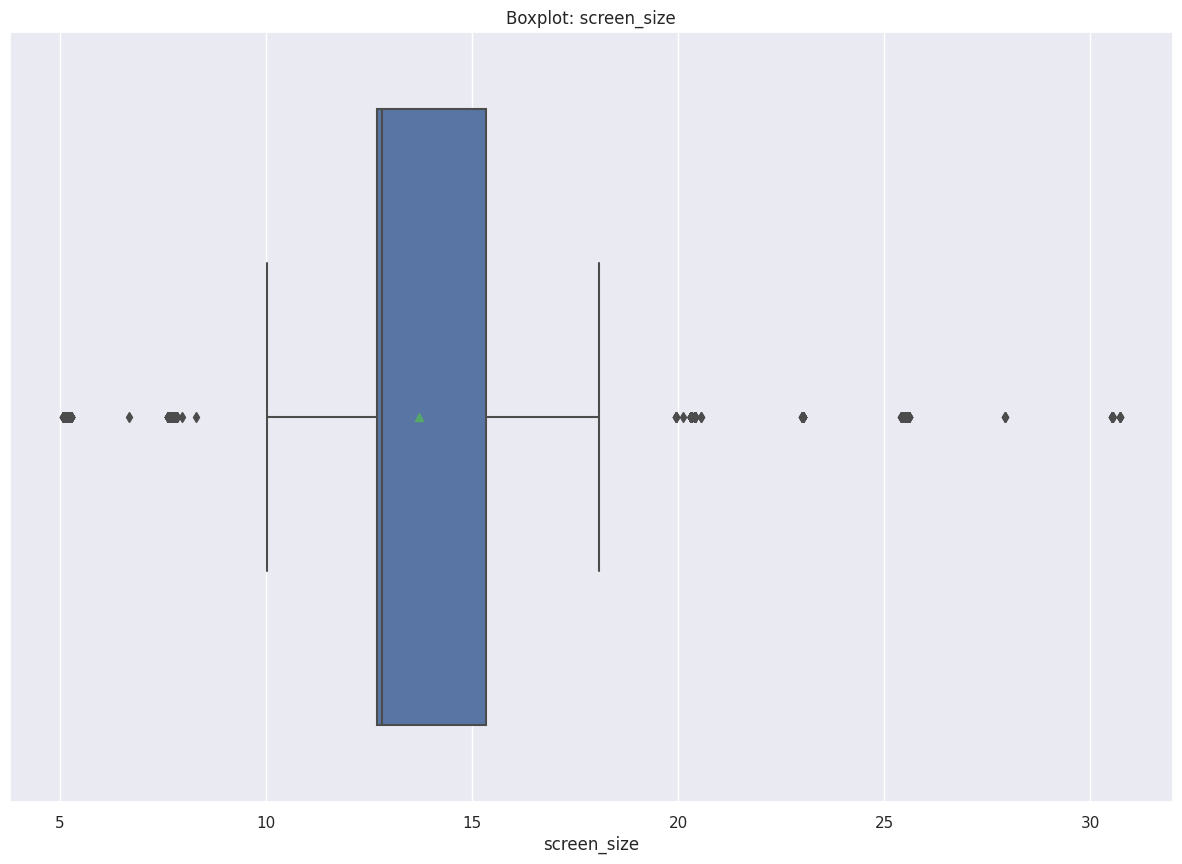

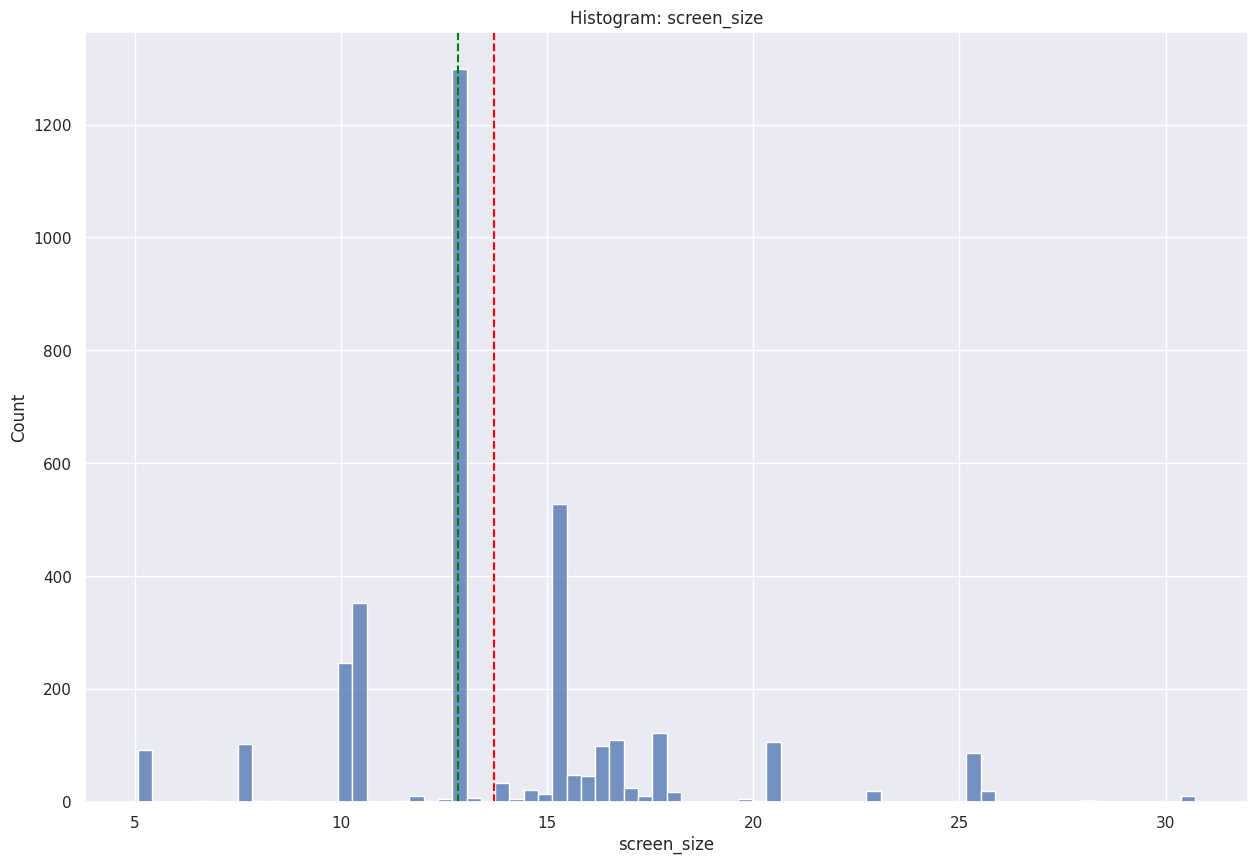

In [ ]:
# Explore the distribution of screen size using boxplot and histplot
column_name = 'screen_size'
boxplot_histplot(column_name)



###Observations

**Question No.5**

5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
screen_greater_than_6 = df[(df['screen_size'] > 6)].shape[0]
print('The number of phones and tablets with screen size greater than 6 is', screen_greater_than_6)

The number of phones and tablets with screen size greater than 6 is 3362


###Observations

 * Most of the devices have screen sizes ranging between 10inches and 20inches

 * The distribution of the screen size is right skrewed and there are many outliers on both side.

 * The median screen size is approximately 12.9inches.


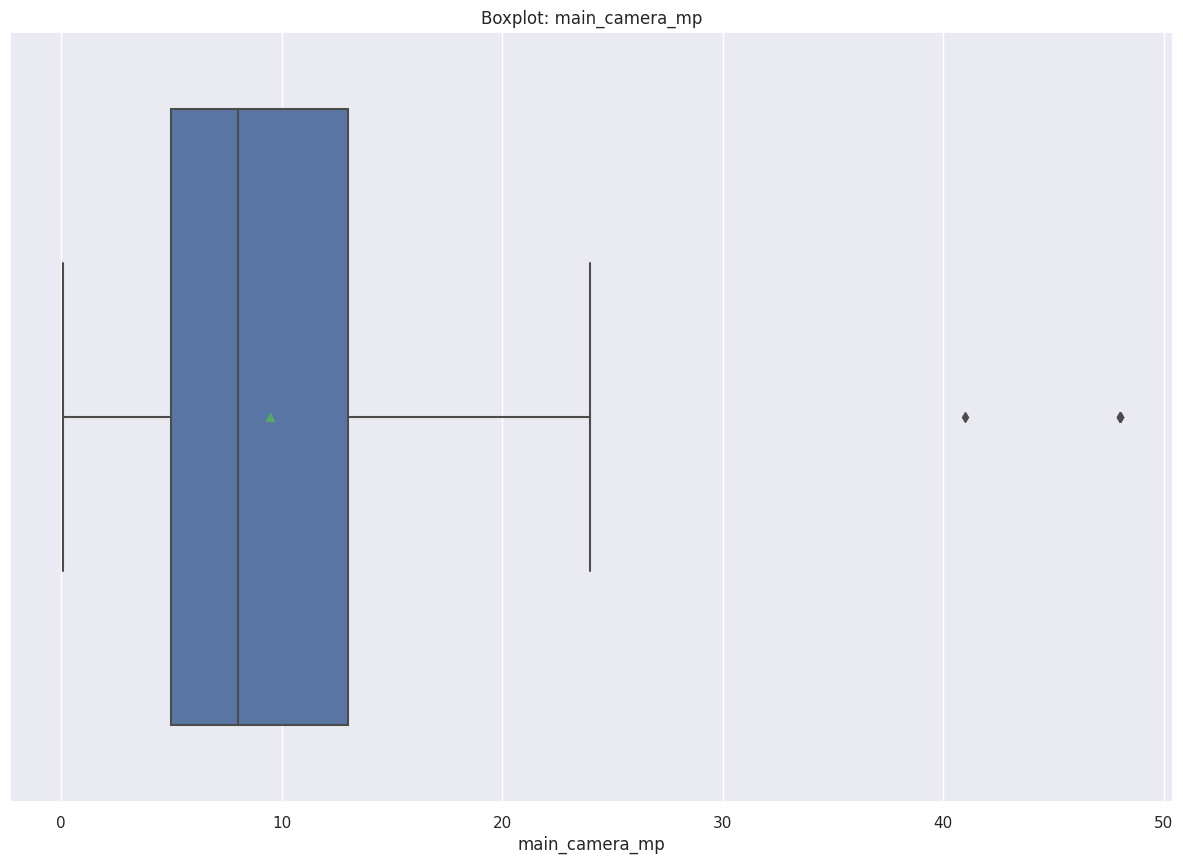

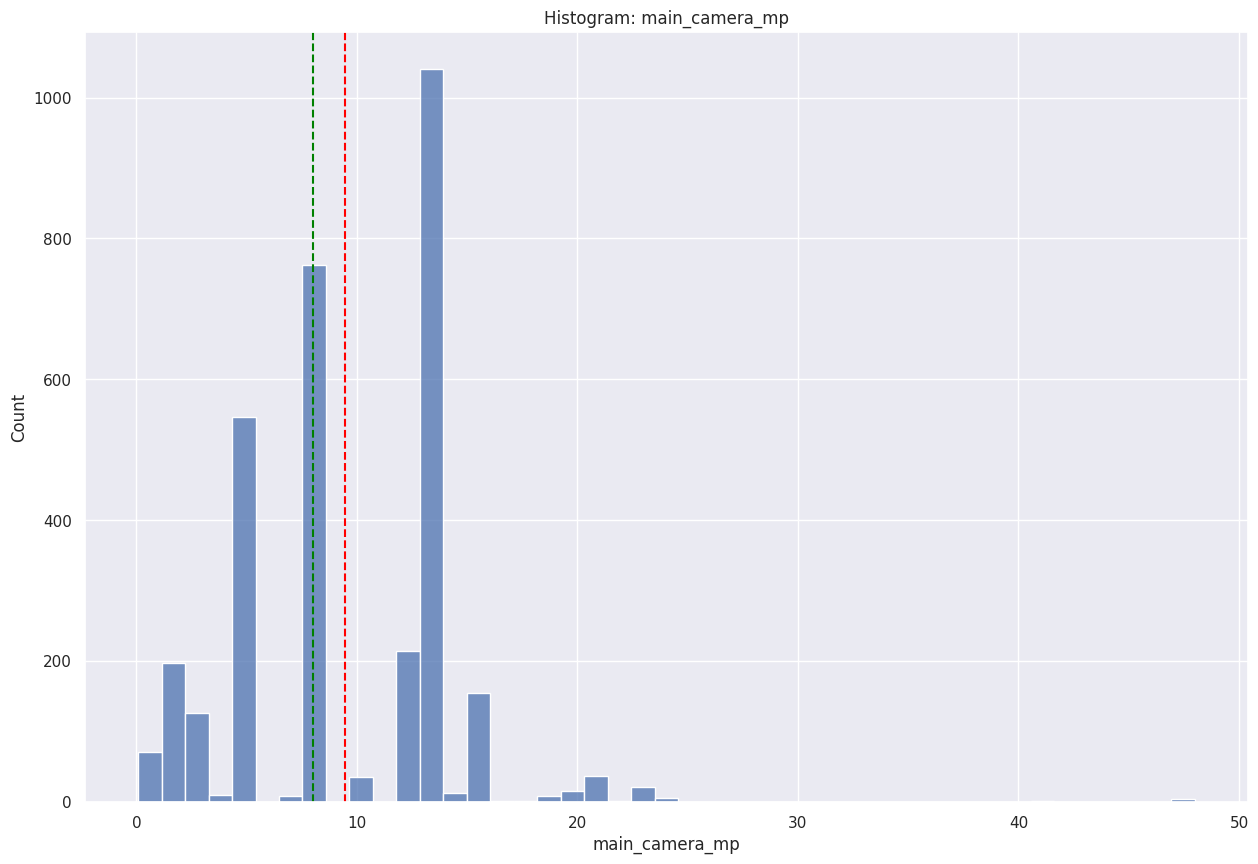

In [ ]:
# Explore the distribution of Main camera using boxplot and histplot
column_name = 'main_camera_mp'
boxplot_histplot(column_name)


In [ ]:
# check the number of devices with main camera size greater than 10MP
df[(df['main_camera_mp'] > 10)].shape[0]
print('The number of devices with main camera size greater than 10 MP is',df[(df['main_camera_mp'] > 10)].shape[0] )

# create a dataset for devices that offer more than 10MP main camera size and explore it distribution
df2 = df[(df['main_camera_mp'] > 10)]
device_more_than_10MP_median = df2['main_camera_mp'].median()
print('The median main camera size for devices with more than 10MP is',device_more_than_10MP_median )
device_more_than_10MP_mean = df2['main_camera_mp'].mean()
print('The average main camera size for devices with more than 10MP is',device_more_than_10MP_mean )


The number of devices with main camera size greater than 10 MP is 1547
The median main camera size for devices with more than 10MP is 13.0
The average main camera size for devices with more than 10MP is 13.706916612798967


###Observations

* The distribution of main camera is right skrewed and there are outliers.

* Both the median and mean size of the main camera of different devices are below 10MP.

* Few devices have main camera size between 40MP and 50MP as seen in the outliers.

* The number of devices with main camera size greater than 10MP is 1547.

* The distribution of devices with more than 10MP main camera size has median of 13MP and mean of 13.7MP main camera size.

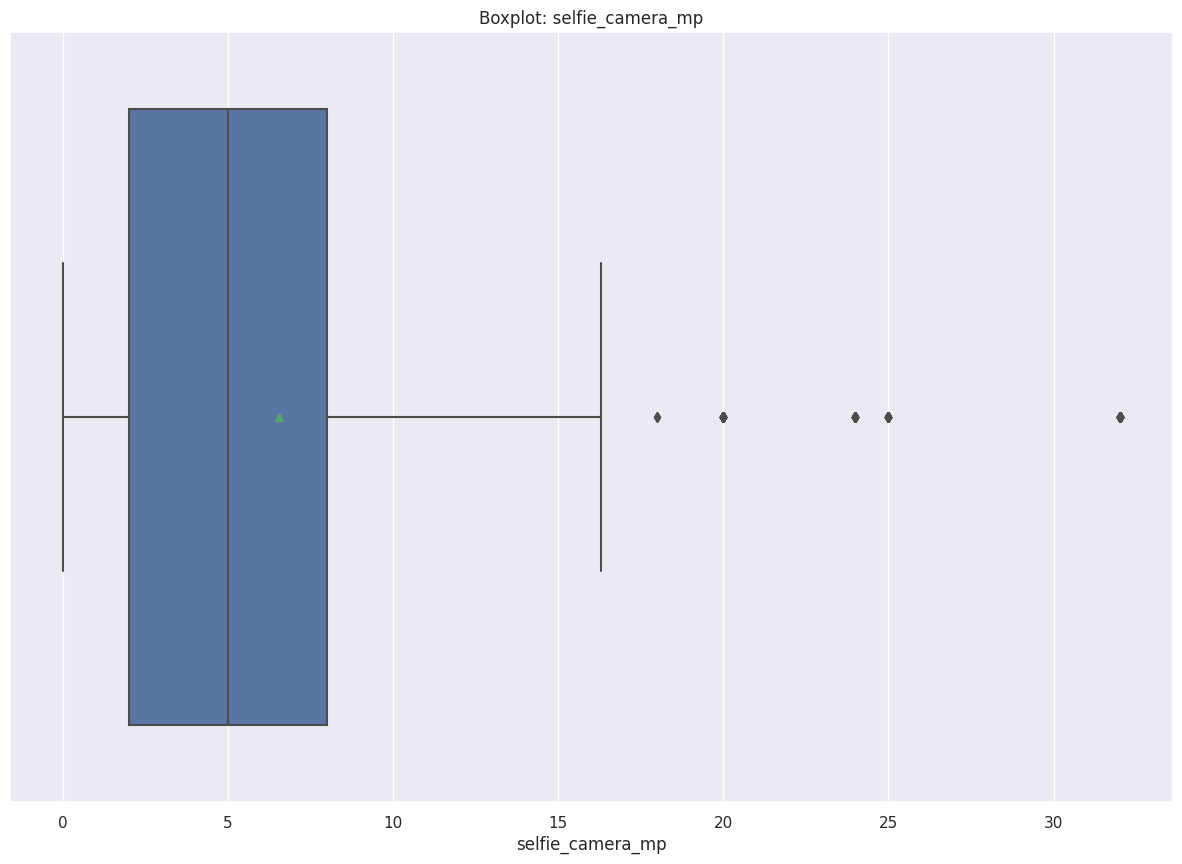

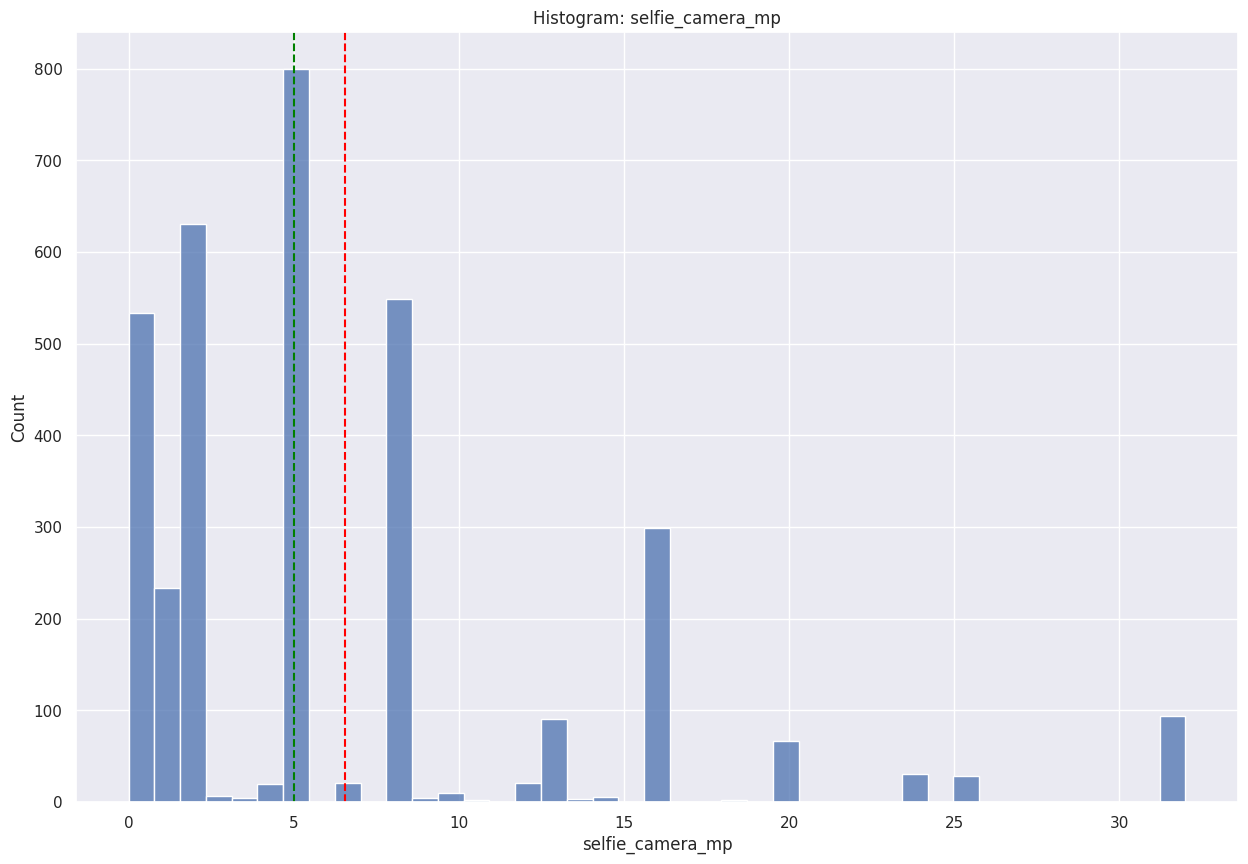

In [ ]:
# Explore the distribution of Selfie camera using boxplot and histplot
column_name = 'selfie_camera_mp'
boxplot_histplot(column_name)


###Observations

* The distribution of selfie camera is right skewed with outliers.

* The median and mean size of the selfie camera of all the devices are below 8MP.

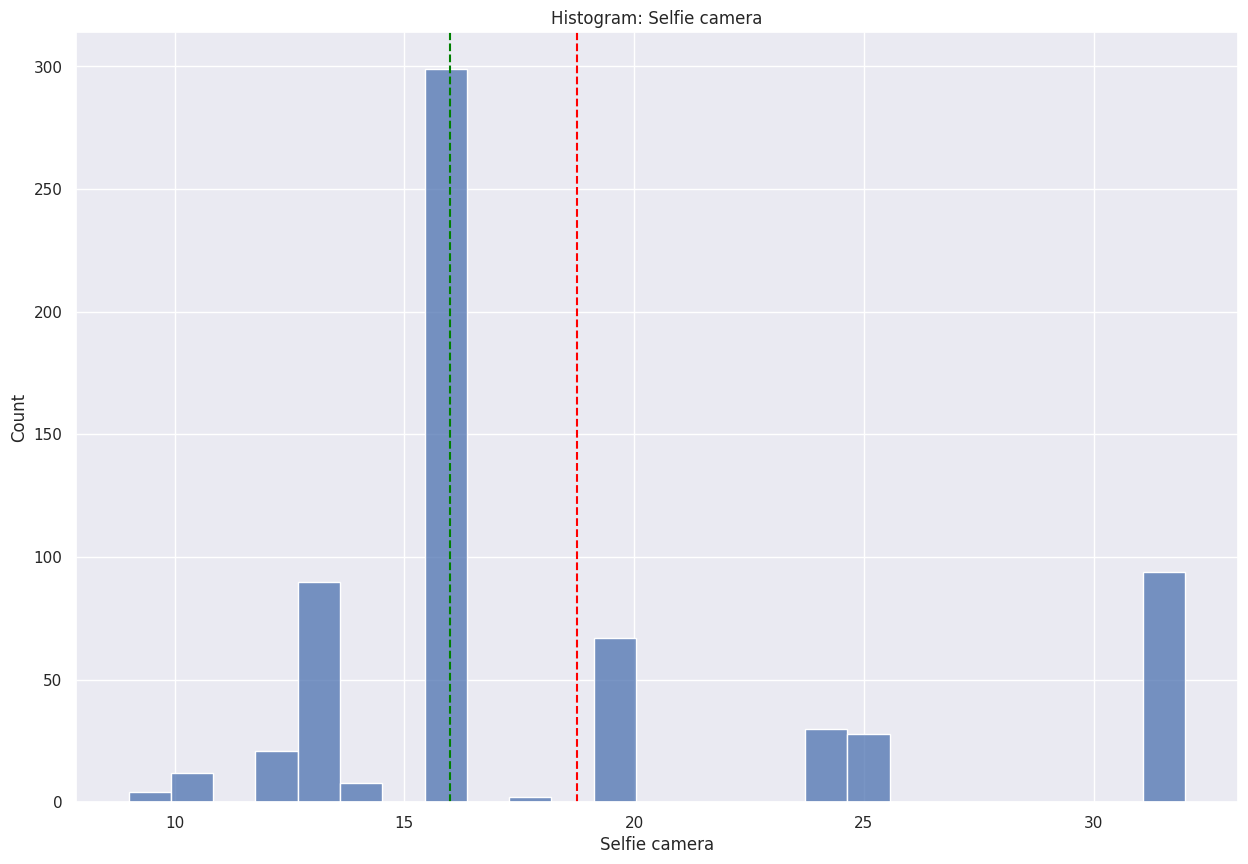

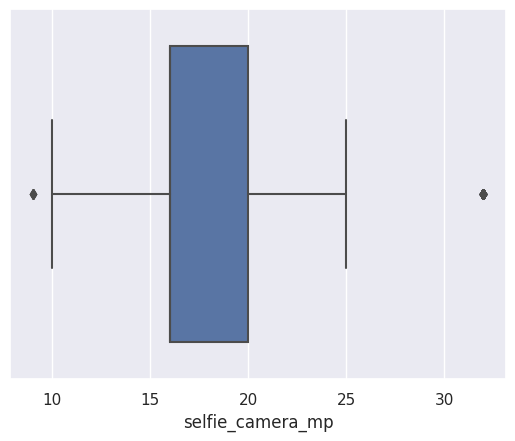

In [ ]:
# Explore the distribution of Selfie camera greater than 8MP using histogram
df1 = df[(df['selfie_camera_mp'] > 8)] # creating a sub set of data with selfie camera greater than 8MP
plt.figure(figsize = (15,10) )
plt.title('Histogram: Selfie camera')
plt.xlabel('Selfie camera')
sns.histplot(data = df1, x = 'selfie_camera_mp')
mean = df1['selfie_camera_mp'].mean()
median = df1['selfie_camera_mp'].median()
plt.axvline(x=mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=median, color='green', linestyle='--', label='Median')
plt.show()

# Explore the distribution of selfie camera greater than 8MP using boxplot
sns.boxplot( data = df1, x = 'selfie_camera_mp')
plt.show()

In [ ]:
# Check the number of devices with selfie camera greater than 8MP
df1.shape[0]
print('The number of devices with selfie camera size greater than 8MP is',df1.shape[0] )
df1['selfie_camera_mp'].median()
print('The median selfie camera size is ',df1['selfie_camera_mp'].median(),'MP')
df1['selfie_camera_mp'].mean()
print('The average selfie camera size is ',df1['selfie_camera_mp'].mean(),'MP')

The number of devices with selfie camera size greater than 8MP is 655
The median selfie camera size is  16.0 MP
The average selfie camera size is  18.750839694656488 MP


###Observations

**Question No.6**

6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

**Answer**

* The distribution of the devices offering greater than 8MP selfie cameras is right skewed.

* The number of devices with more than 8MP selfie camera size is 655

* The median selfie camera size is 16MP.

* The average selfie camera size is approximately 18.75MP



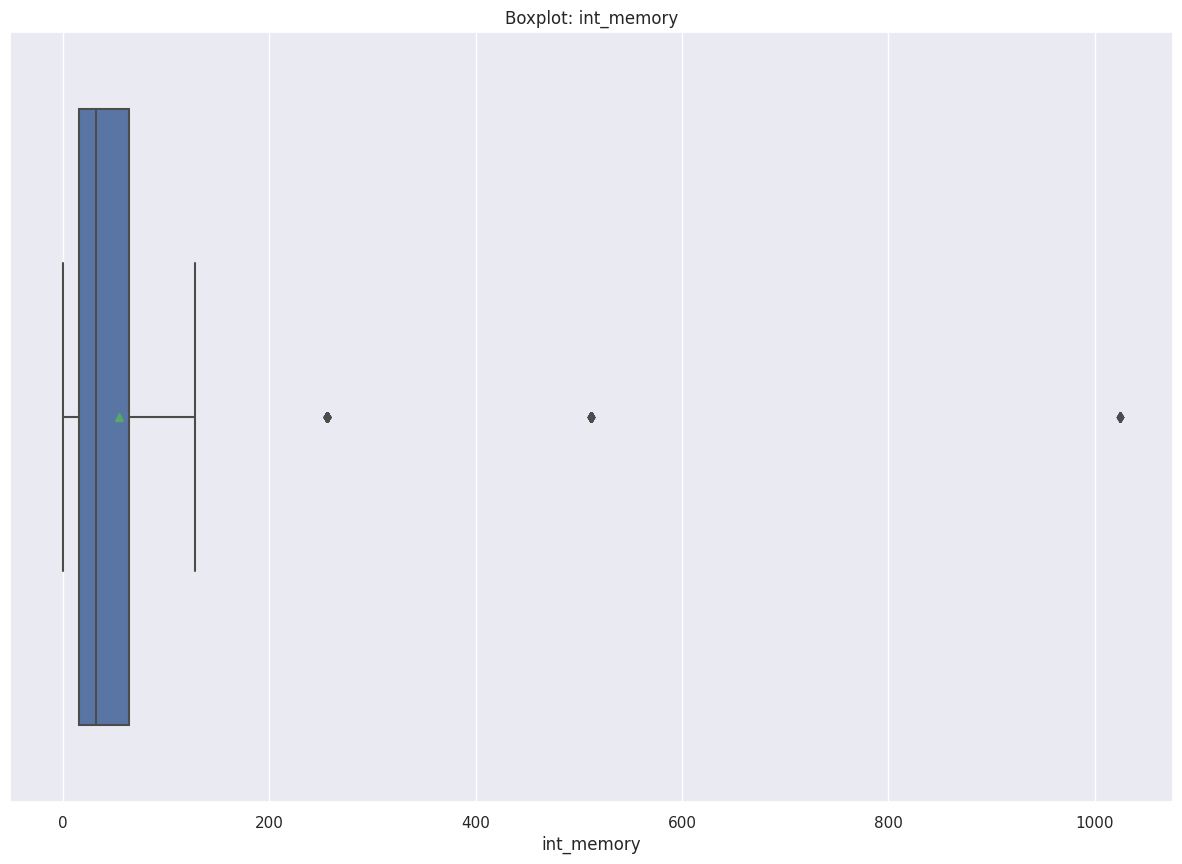

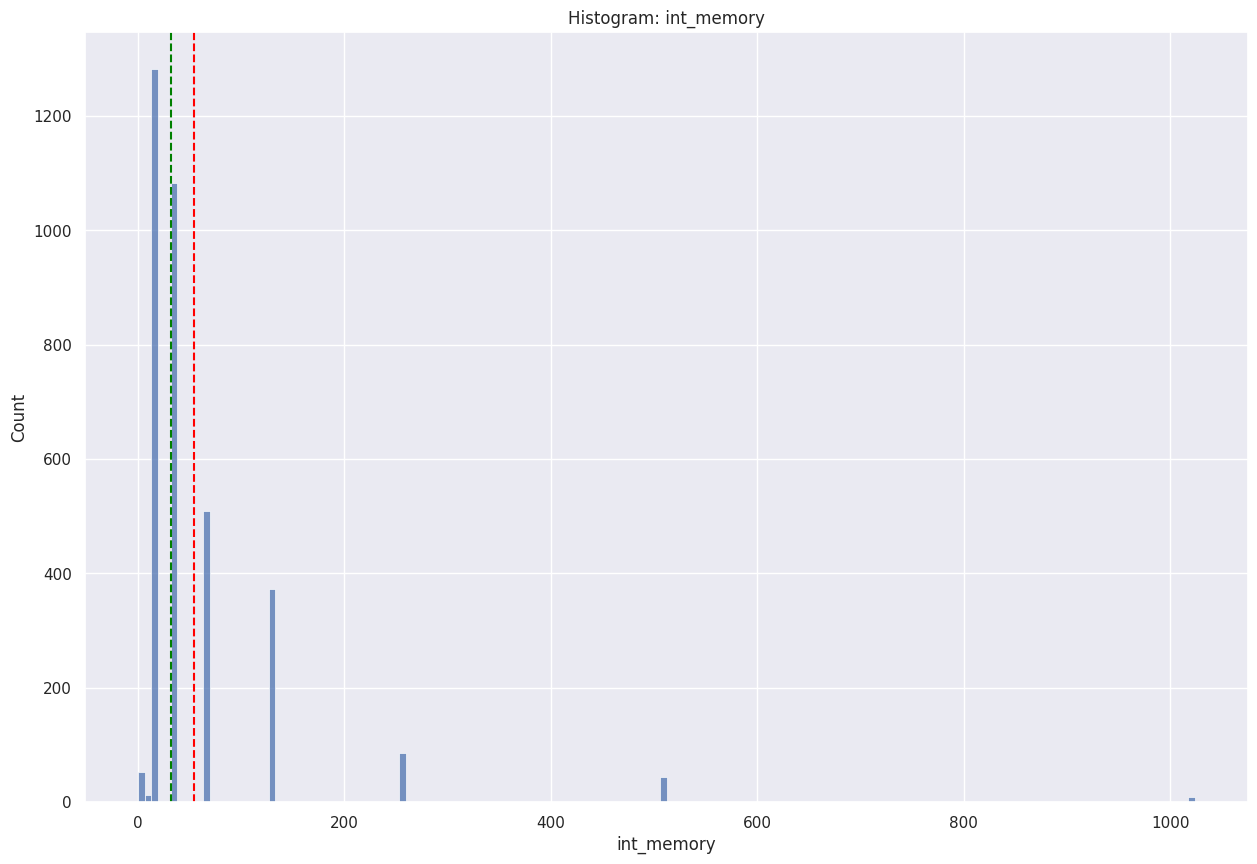

In [ ]:
# Explore the distribution of Internal memory using boxplot and hisplot
column_name = 'int_memory'
boxplot_histplot(column_name)

In [ ]:
df['int_memory'].median()
print('The median internal memory is',df['int_memory'].median() )
df[(df['int_memory'] > 32)].shape[0]
print('The number of devices with internal memory greater than 32GB is',df[(df['int_memory'] > 32)].shape[0] )

The median internal memory is 32.0
The number of devices with internal memory greater than 32GB is 1019


###Observations.

* The distribution of internal memory is right skrewed.
* The median internal memory is 32GB.
* The number of devices with more than 32GB internal memory is 1019.

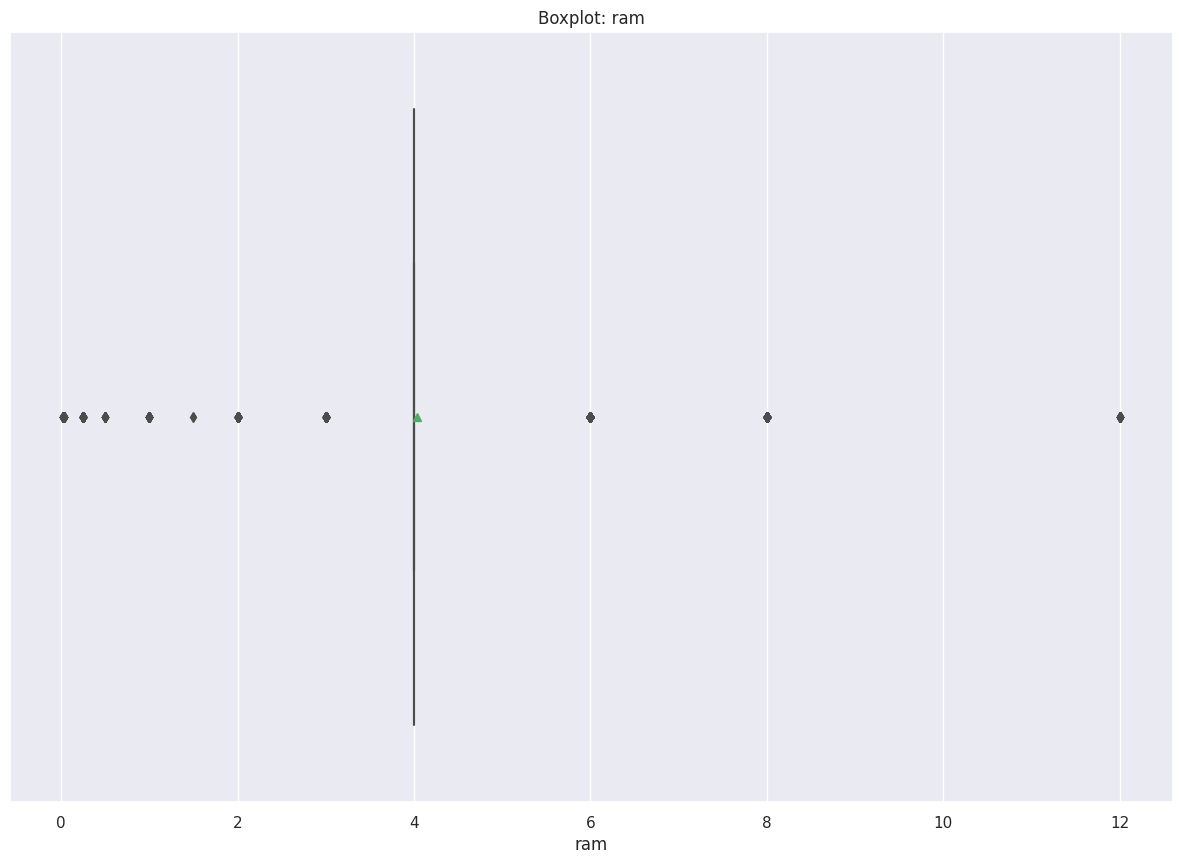

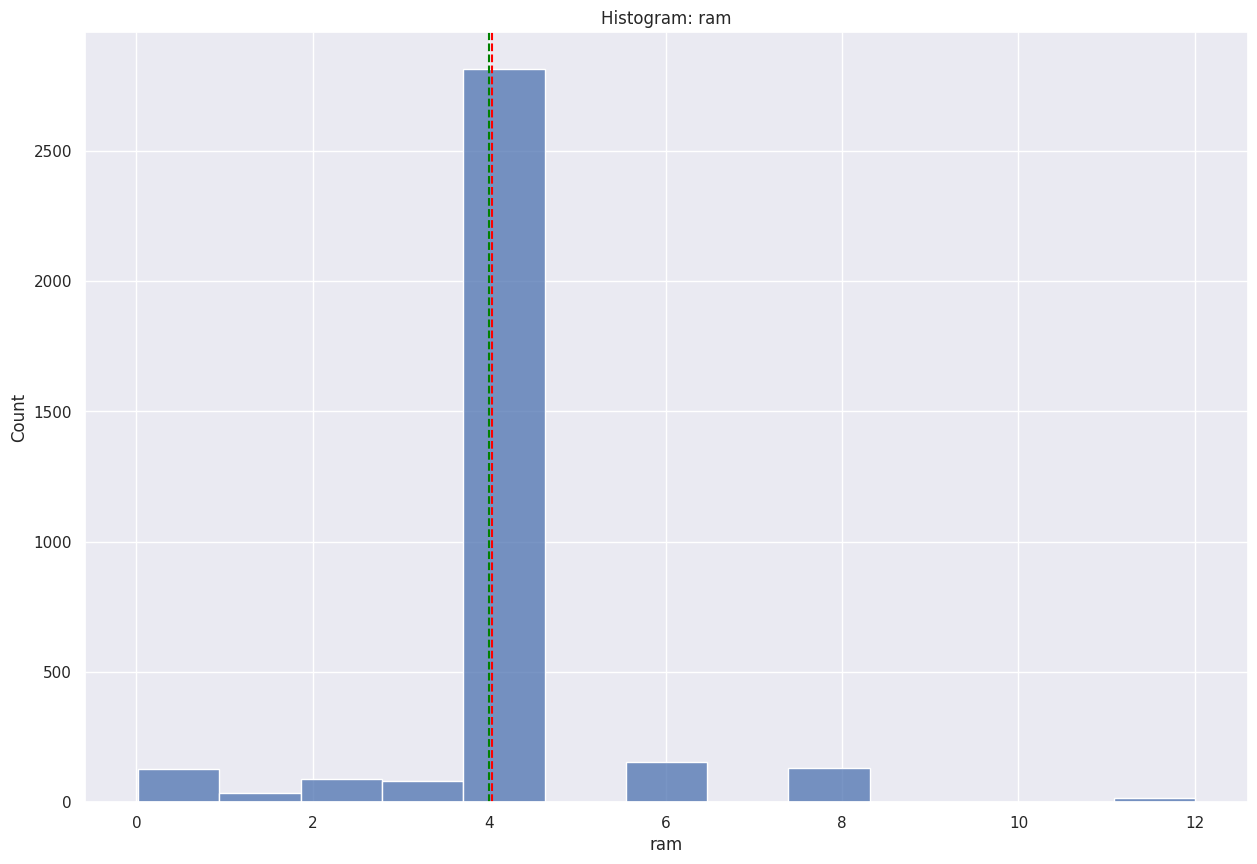

In [ ]:
# Explore the distribution of Ram using boxplot and hisplot
column_name = 'ram'
boxplot_histplot(column_name)

In [ ]:
# find the number of devices with more than 4GB RAM size
print('The number of devices with more than 4GB RAM size is', df[(df['ram'] > 4)].shape[0])

The number of devices with more than 4GB RAM size is 302


###Observations

* The median RAM size of the used devices is 32GB.

* The number of devices with more than 4GB RAM is 302

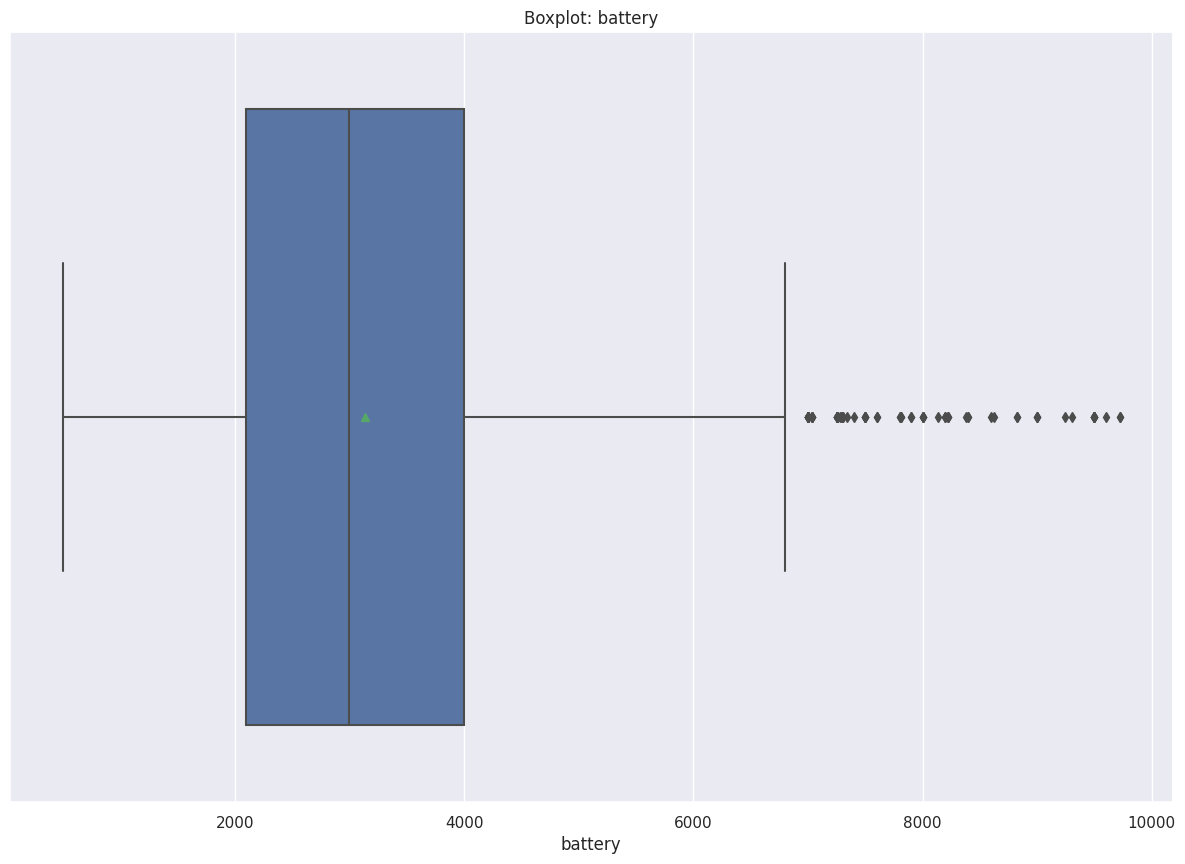

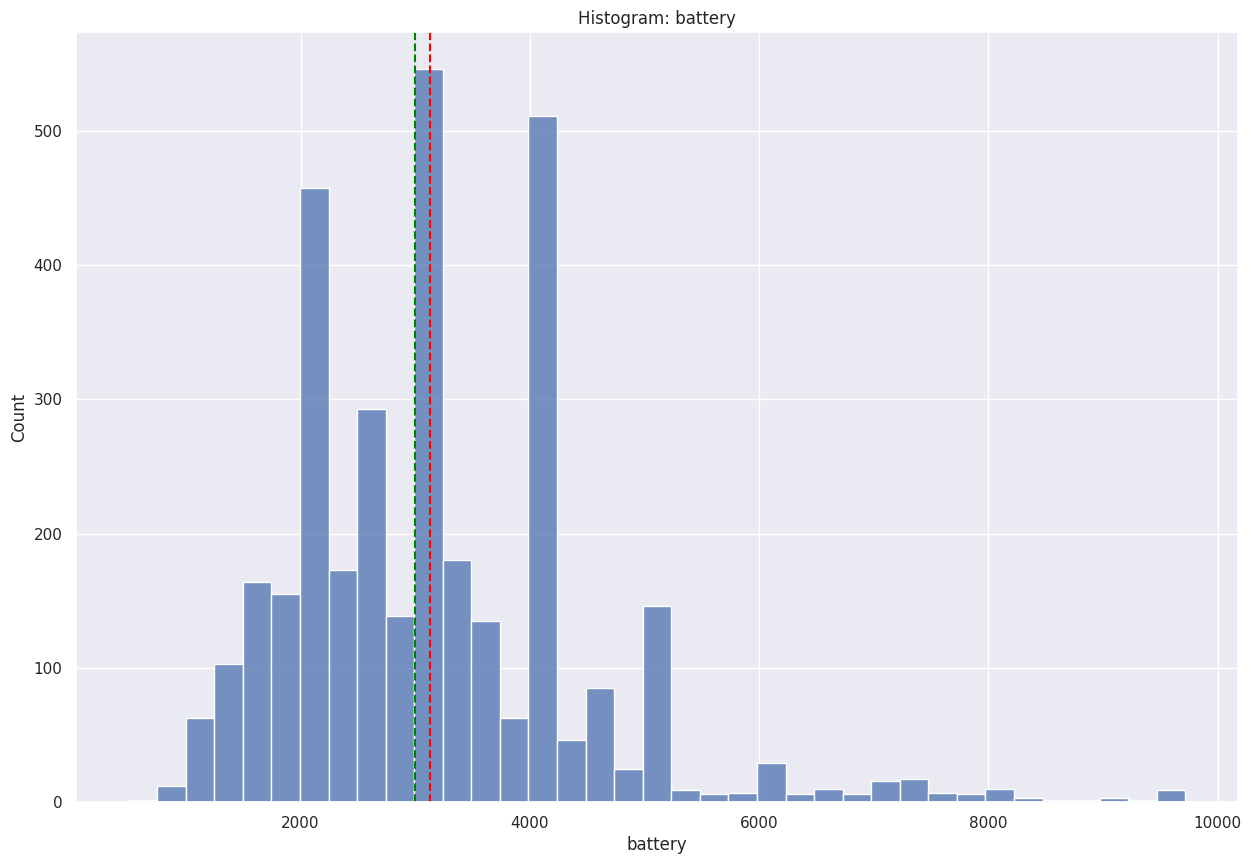

In [ ]:
# Explore the distribution of Battery using boxplot and hisplot
column_name = 'battery'
boxplot_histplot(column_name)

In [ ]:
# find the number of devices with battery size less than 4500mAh
print('The number of devices with battery size less than 45000mAh is',df[(df['battery'] < 4500)].shape[0])
# Find the number of devices with battery size greater than 8000mAh
print('The number of devices with battery size greater than 8000mAh is', df[(df['battery'] > 8000)].shape[0])

The number of devices with battery size less than 45000mAh is 3042
The number of devices with battery size greater than 8000mAh is 27


###Obseravtions

* Majority of the devices(3042 devices) have battery size that are less than 4500mAh

* 27 devices have battery sizes that are above 8000mAh.

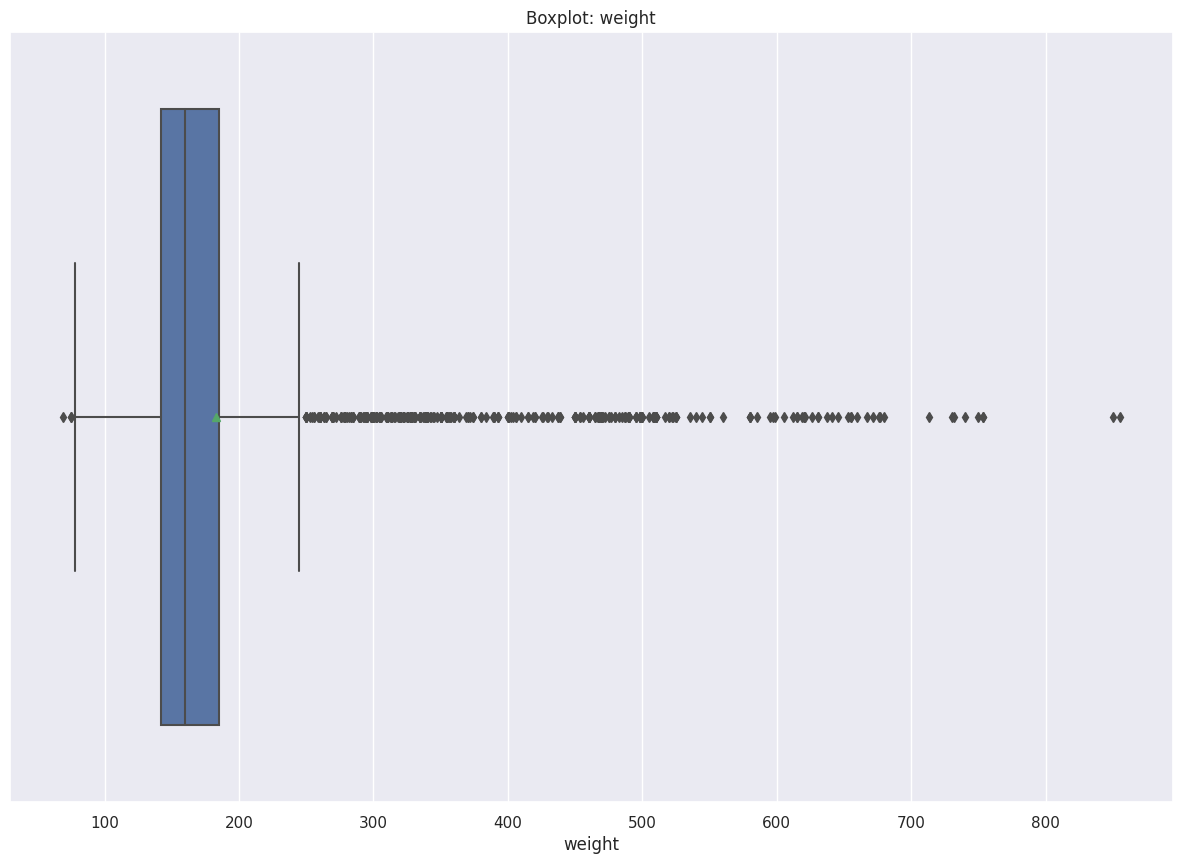

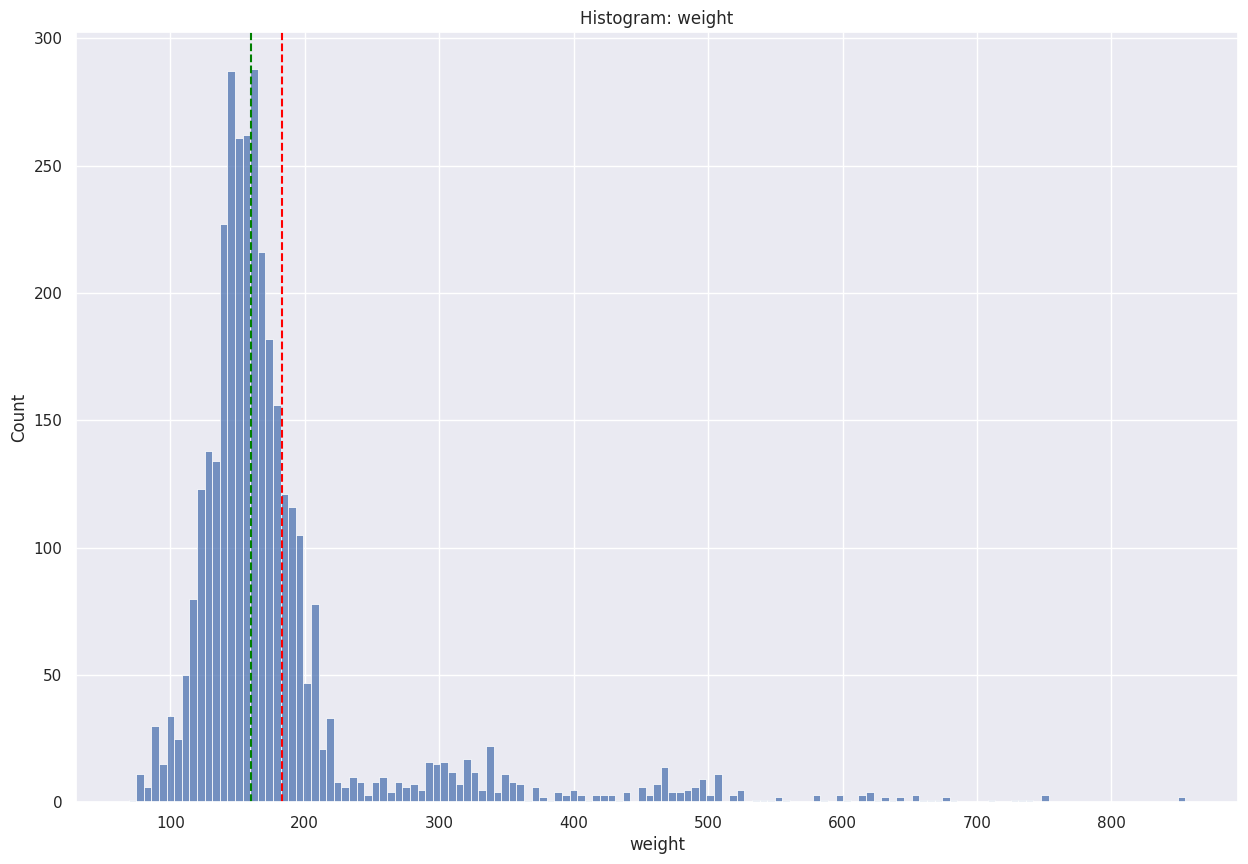

In [ ]:
# Explore the distribution of Weight using boxplot and hisplot
column_name = 'weight'
boxplot_histplot(column_name)

###Observations

* The distribution of the weight of the used devices is right skrewed with many outliers.
* Majority of the used devices weigh between 100g and 220g.

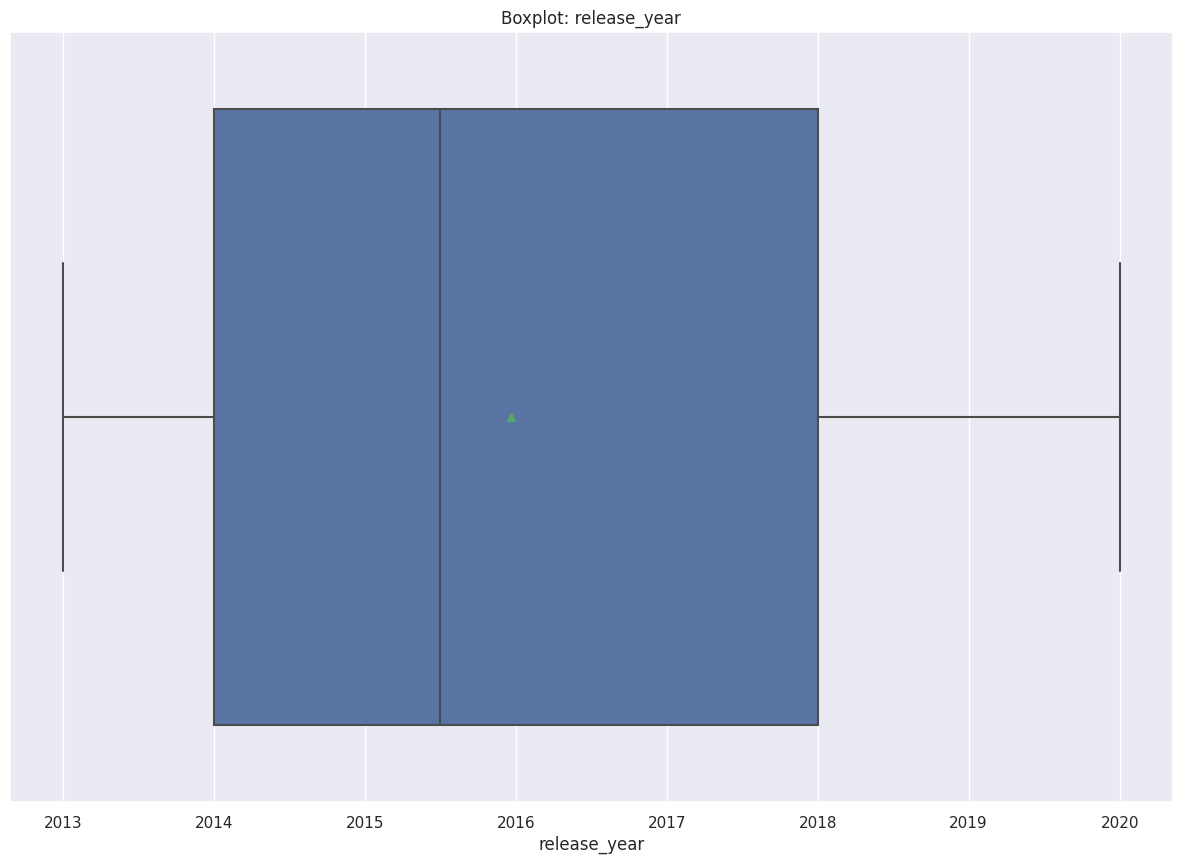

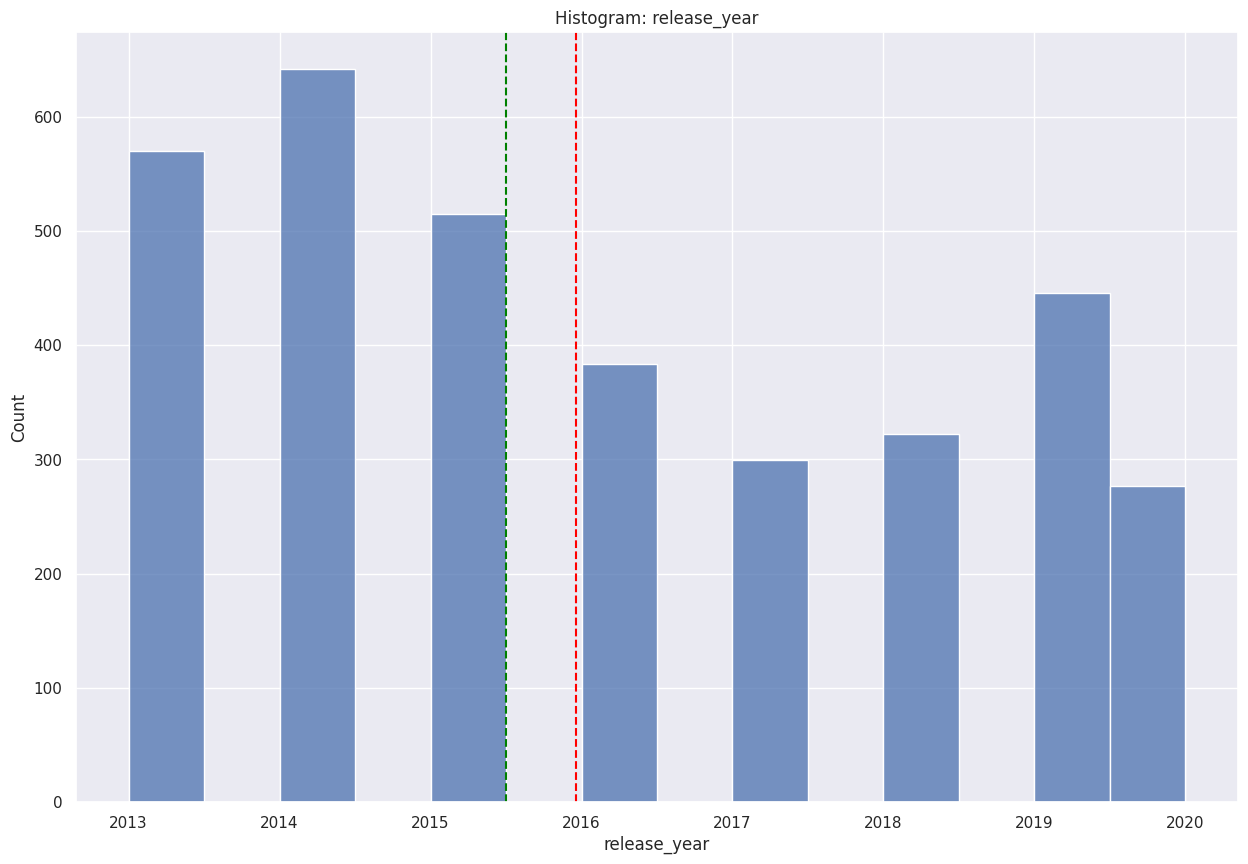

In [ ]:
# Explore the distribution of Released year using boxplot and hisplot
column_name = 'release_year'
boxplot_histplot(column_name)

###Observations

* The oldest used devices were released in 2013 while the latest used devices were released in 2020.
* The avearge number of used devices were released between 2015 and 2016

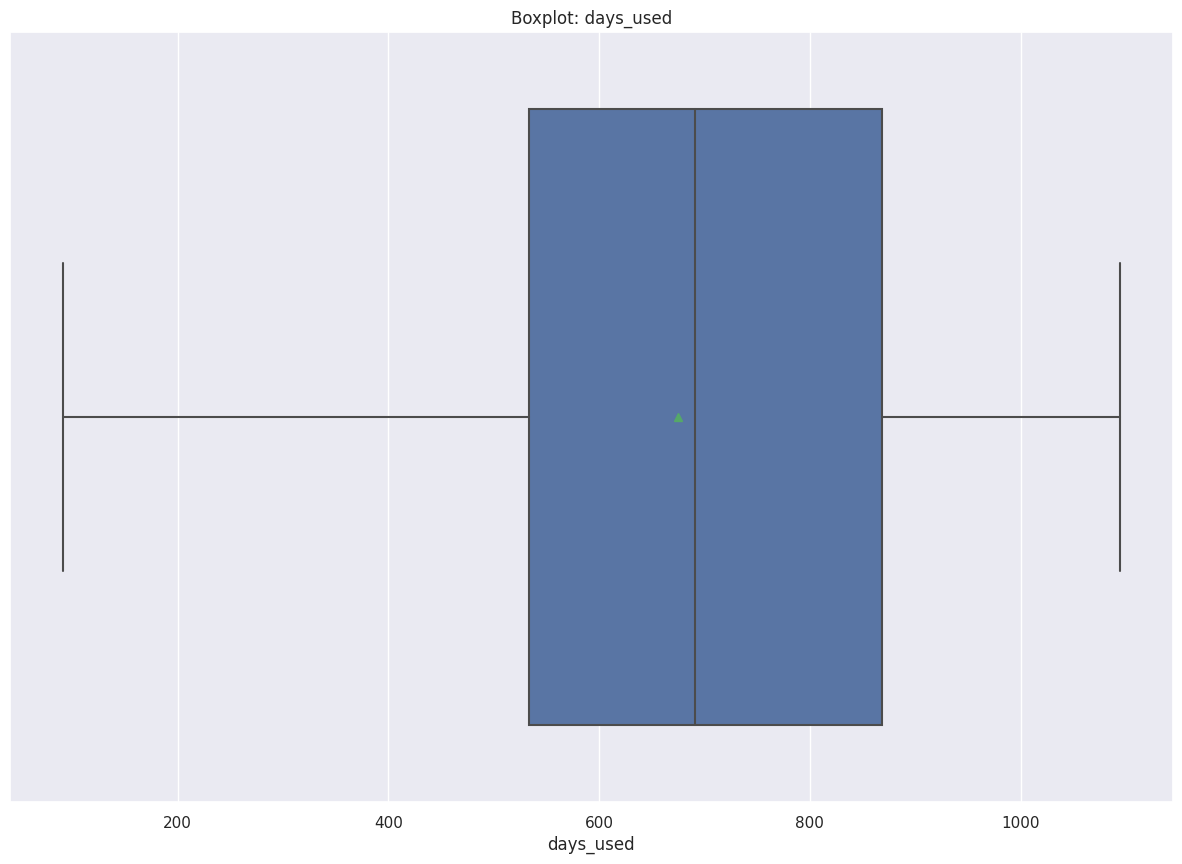

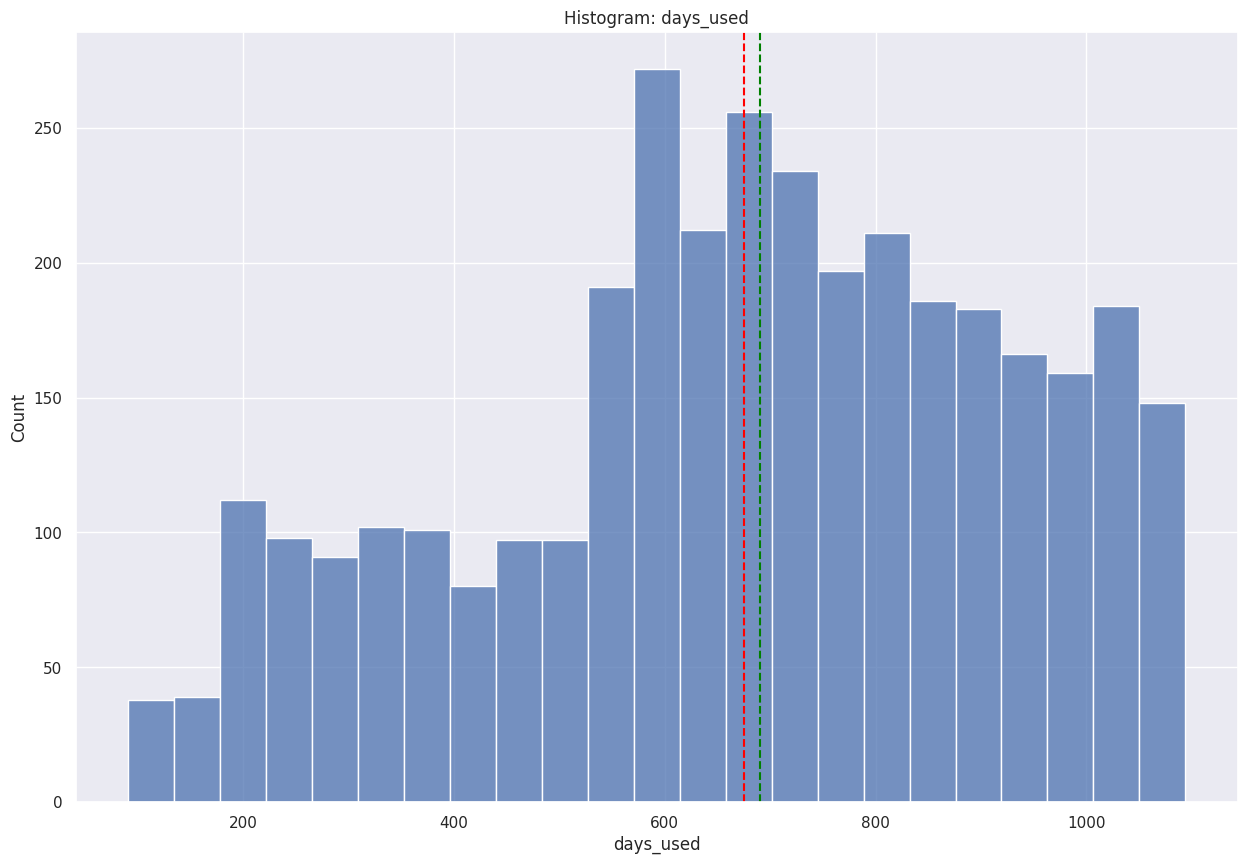

In [ ]:
# Explore the distribution of Days used using boxplot and hisplot
column_name = 'days_used'
boxplot_histplot(column_name)

In [ ]:
# check the number of devices that were used for less than 200days
print('The number of used devices that were used for less than 200 days is', df[(df['days_used'] < 200)].shape[0])

The number of used devices that were used for less than 200 days is 122


###Observations

* Majority of the used devices have been used for more than 500 days.

* Few devices have been used below 200 days.

* The number of devices that were used for less than 200 days is 122. It seems that 122 devices are almost new.


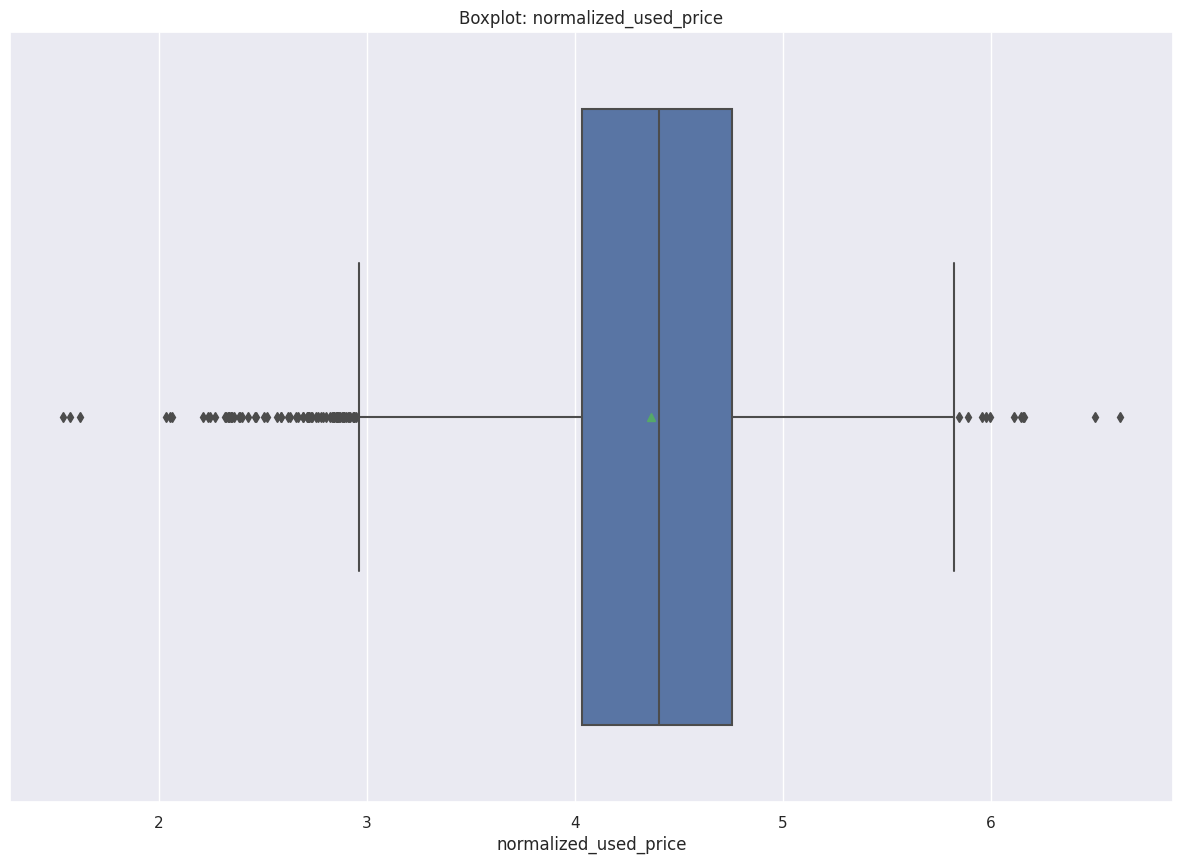

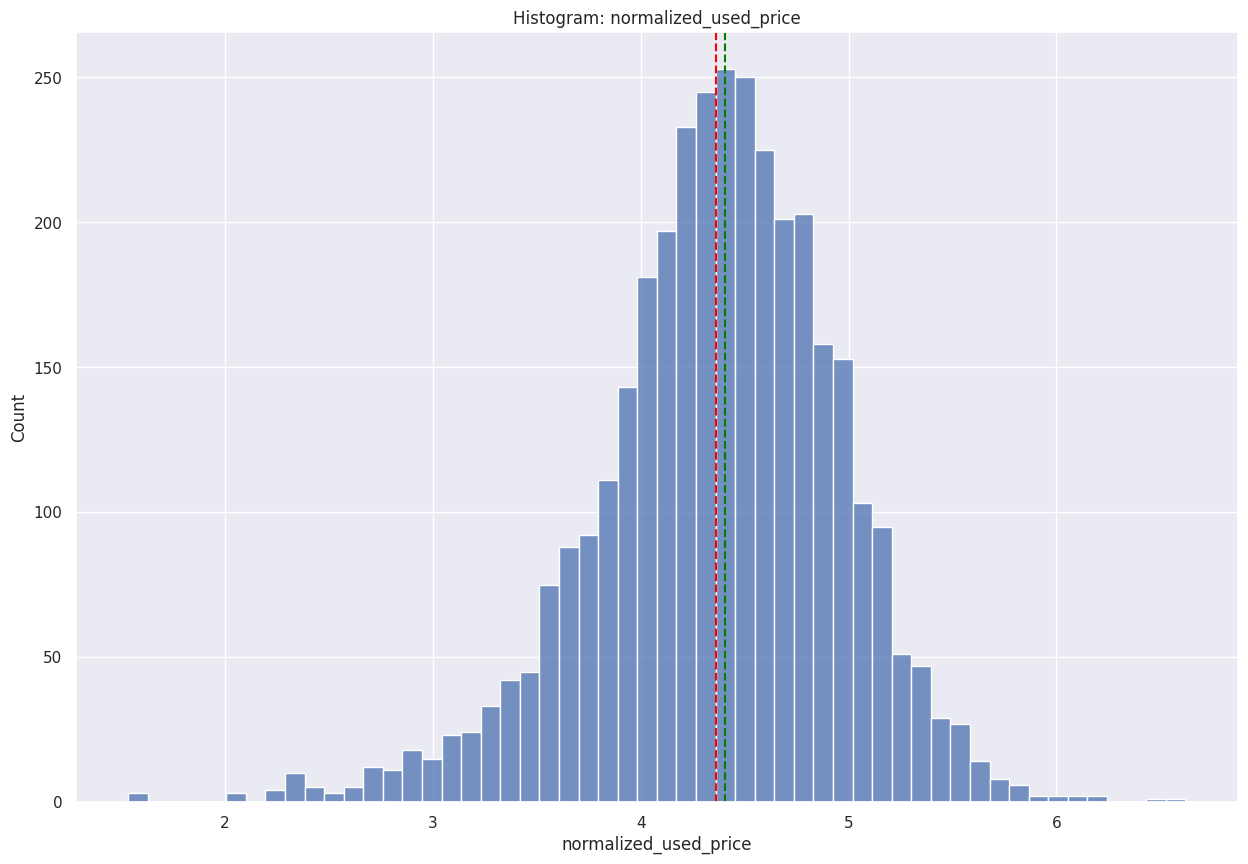

In [ ]:
# Explore the distribution of Normalized used price using boxplot and hisplot
column_name = 'normalized_used_price'
boxplot_histplot(column_name)

**Question No.1**:

1. What does the distribution of normalized used device prices look like?

**Answer**:

The distribution of normalized used device prices is close to normal distribution with outliers on both side.
It is slightly left skrewed due to the concentration of more outliers on the left side.

**Other Observations**

The average price of the normalized used device is approximately 4.4 euros.
Fews devices seemed to be sold below 2 euros


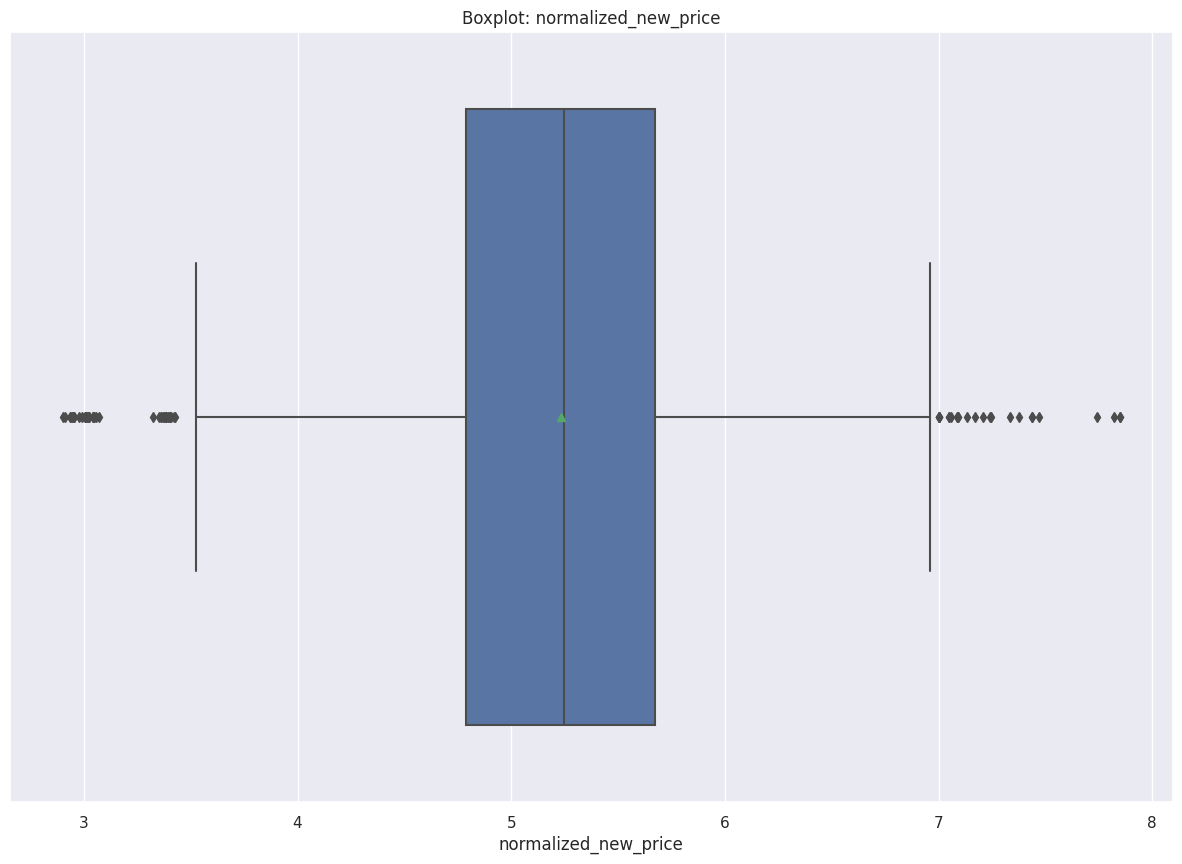

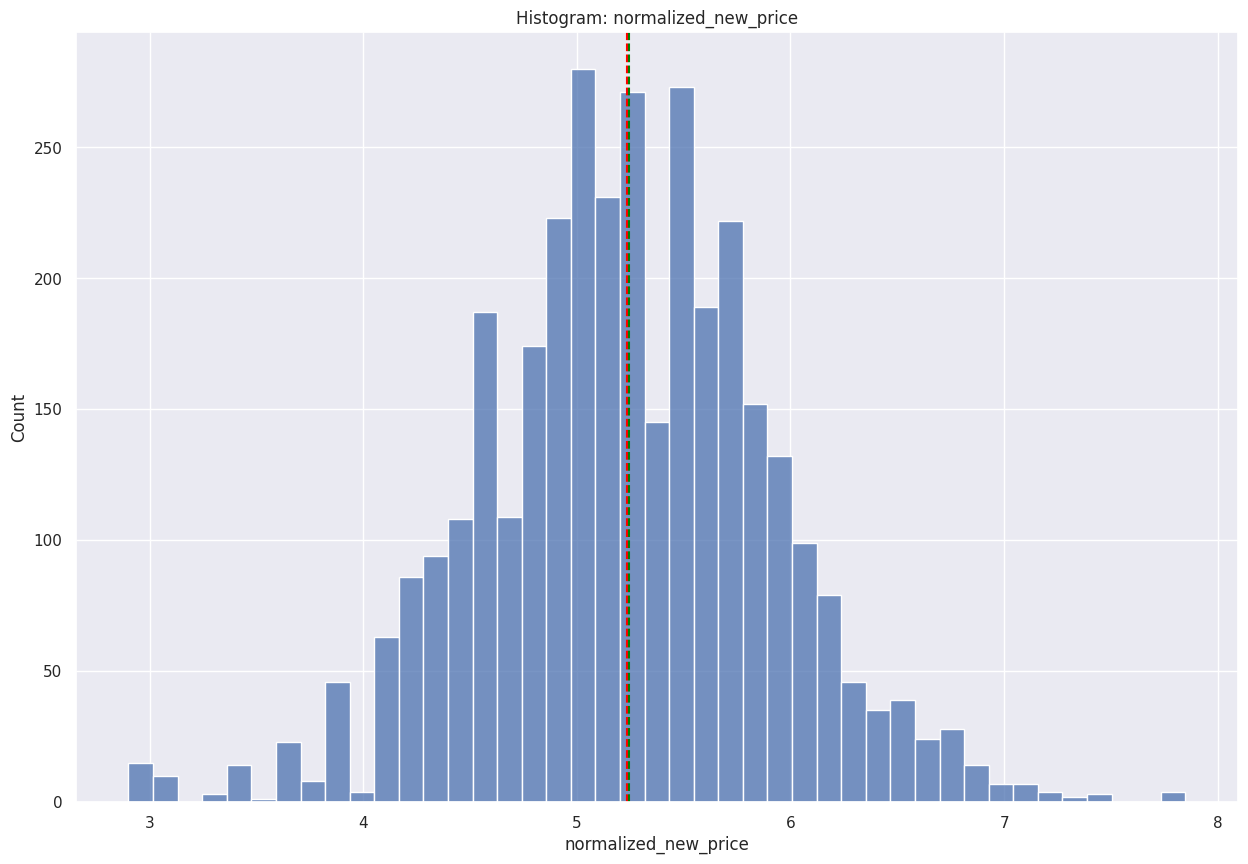

In [ ]:
# Explore the distribution of Normalized used price using boxplot and hisplot
column_name = 'normalized_new_price'
boxplot_histplot(column_name)

###Observations

* The distribution of normalized new price is symetrical with outliers on both sides.

#### Exploring the distribution of the categorical variables (object type)

brand_name, os, 4g, 5g



In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

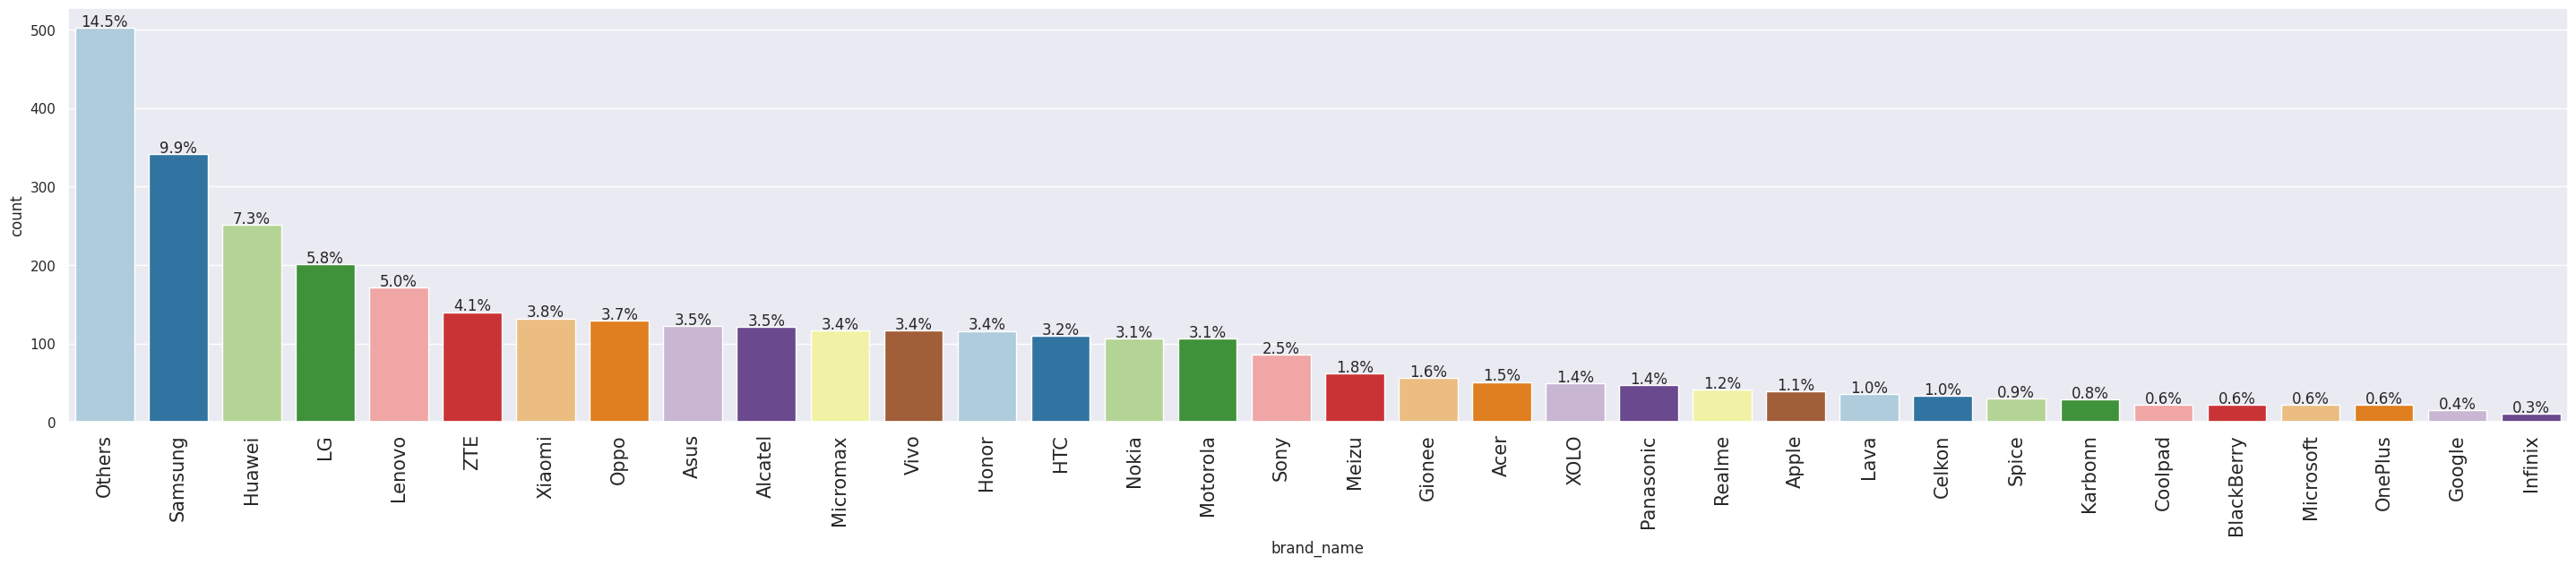

In [ ]:
# Explore the distribution of Brand name using bar chart

labeled_barplot(data = df,feature = 'brand_name' , perc=True)

###Observations

* Apart from brand name classified as 'others', Samsumg is the most popular in the used device market with 9.9% while infinix is the least popular with 0.3%

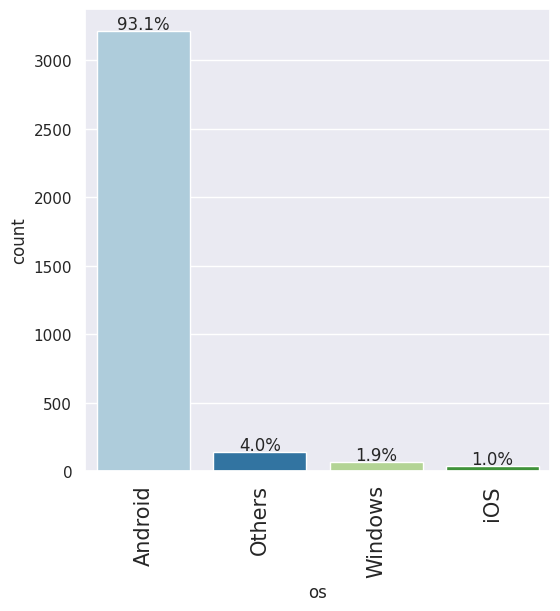

In [ ]:
# Explore the distribution of OS using bar chart

labeled_barplot(data = df, feature = 'os' , perc=True)

**Question No.2**

2. What percentage of the used device market is dominated by Android devices?

**Answer**

The percentage of the used device market dominated by Android is 93.1 percent.

**Other Observations**

iOS is the least dominated of the used device market with 1 percent.

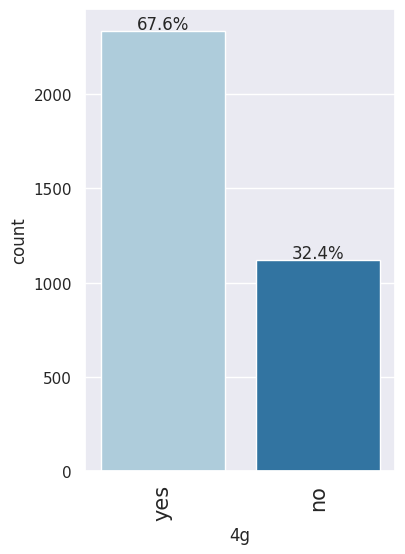

In [ ]:
# Explore the distribution of 4G using bar chart

labeled_barplot(data = df,feature = '4g', perc=True)

In [ ]:
df['4g'].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

### Observations

* The number of phones that are neither 4g nor 5g is 1119

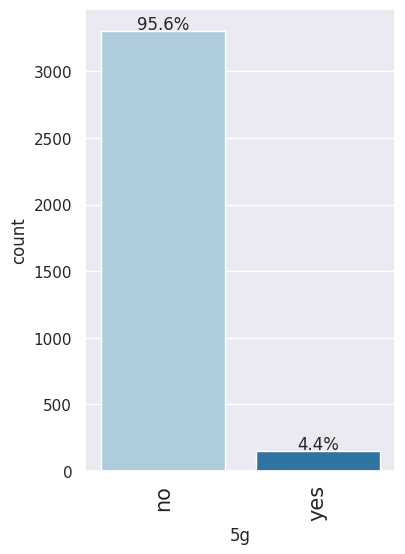

In [ ]:
# Explore the distribution of 5G using bar chart

labeled_barplot(data = df,feature = '5g', perc=True)

In [ ]:
df['5g'].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

### Bivariate data analysis

In [ ]:
# create a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

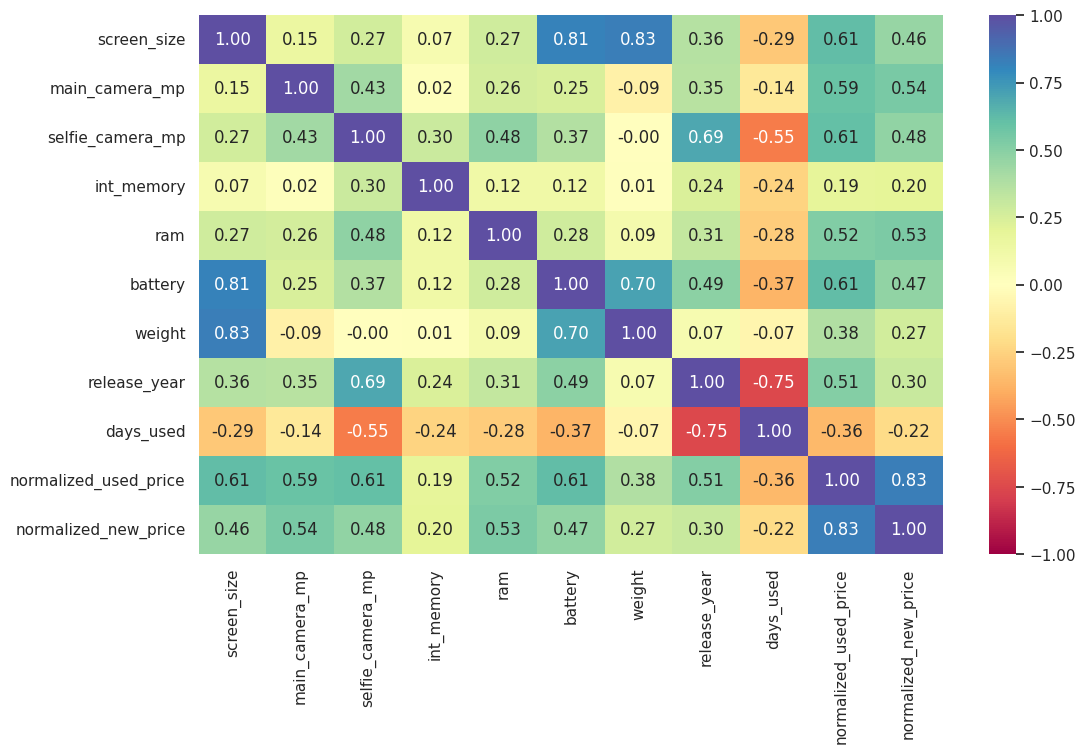

In [ ]:
# check the correlation of the numerical variables using heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Observations

**Question No.7**

7. Which attributes are highly correlated with the normalized price of a used device?

**Answer**

* The attributes that are highly correlated with normalized price of a used device are screen_size, selfie_camera_mp, battery, main_camera_mp, ram and release year.

* The normalized price of used devices has the highest correlation with the normalized price of the new phone.

###Observations

* The released year and days used, has the highest negative correlation of -0.75 which shows that the devices released earlier were more used before they were released to the market.

* screen size and battery, screen size and weight, weight and battery are highly and positively correlated.

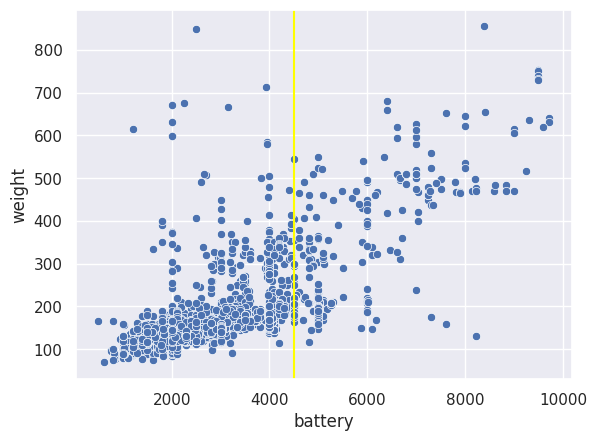

<Axes: xlabel='battery', ylabel='weight'>

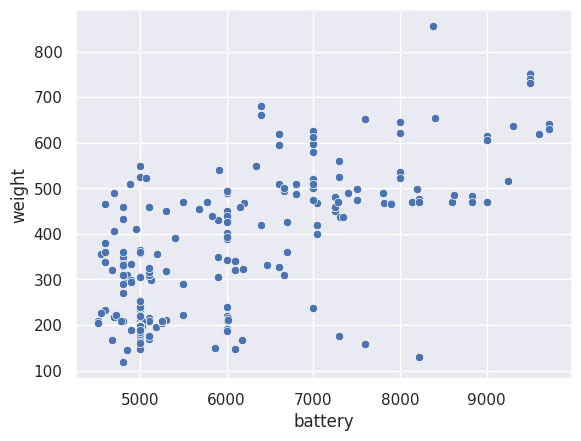

In [ ]:
# check the distribution between battery and weight using scatter plot
sns.scatterplot(data = df, x = 'battery', y = 'weight')
plt.axvline(x = 4500, color = 'yellow') # to trace the number of phones' and tablets' battery size greater than 4500mAh
plt.show()
# explore the distribution of battery greater than 4500mAh and their weight
df3 = df[(df['battery'] > 4500)] # creating a dataset of used device with battery size greater than 4500mAh
sns.scatterplot(data = df3, x = 'battery', y = 'weight')


###Observations

**Question No.4**

4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

**Answer**

 Most of the phones and tablets with larger batteries (more than 4500mAh),have weight of more than 200g.

 The phones' and the tablets' weight increase as the size of the battery increase.


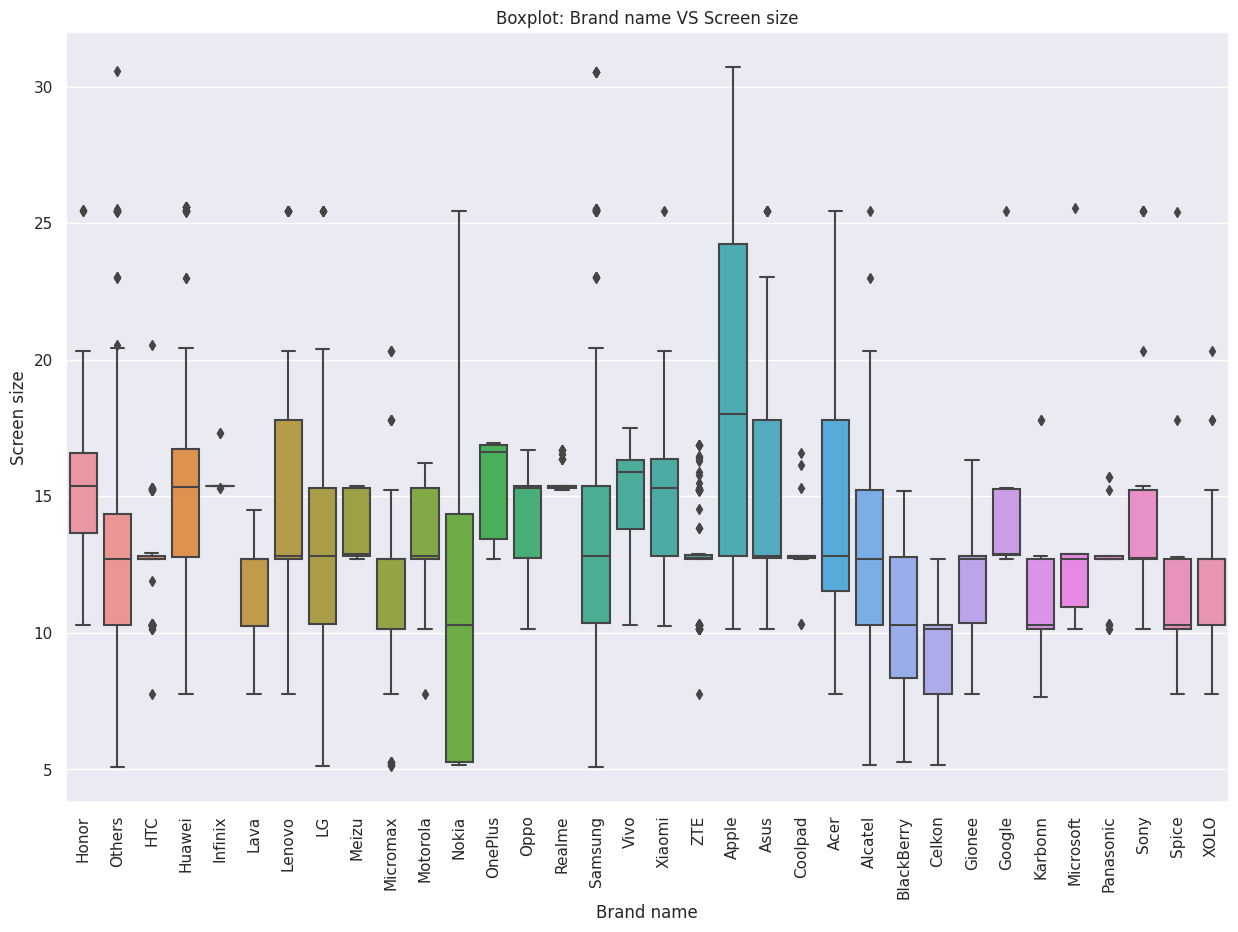

In [ ]:
# Explore the distribution of Brand name vs Screen size using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'screen_size')
plt.title('Boxplot: Brand name VS Screen size')
plt.xlabel('Brand name')
plt.ylabel('Screen size')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are many outliers in the distribution.
* Apple devices does not have any screen sizes that are less than 10cm.
* Screen size of less than 10cm can also not be found in Honor, Oppo, Vivo, Xiaomi, Asus, Coolpad, Google, Microsoft, Panasonic and Sony.
* The used devices with smallest screen size options( approx. 5cm) are LG, Micromax, Nokia, Samsung, Alcatel, Blackberry, Celkon and the brand classified as others.
* Higher screen sizes are mostly available in Apple devices.


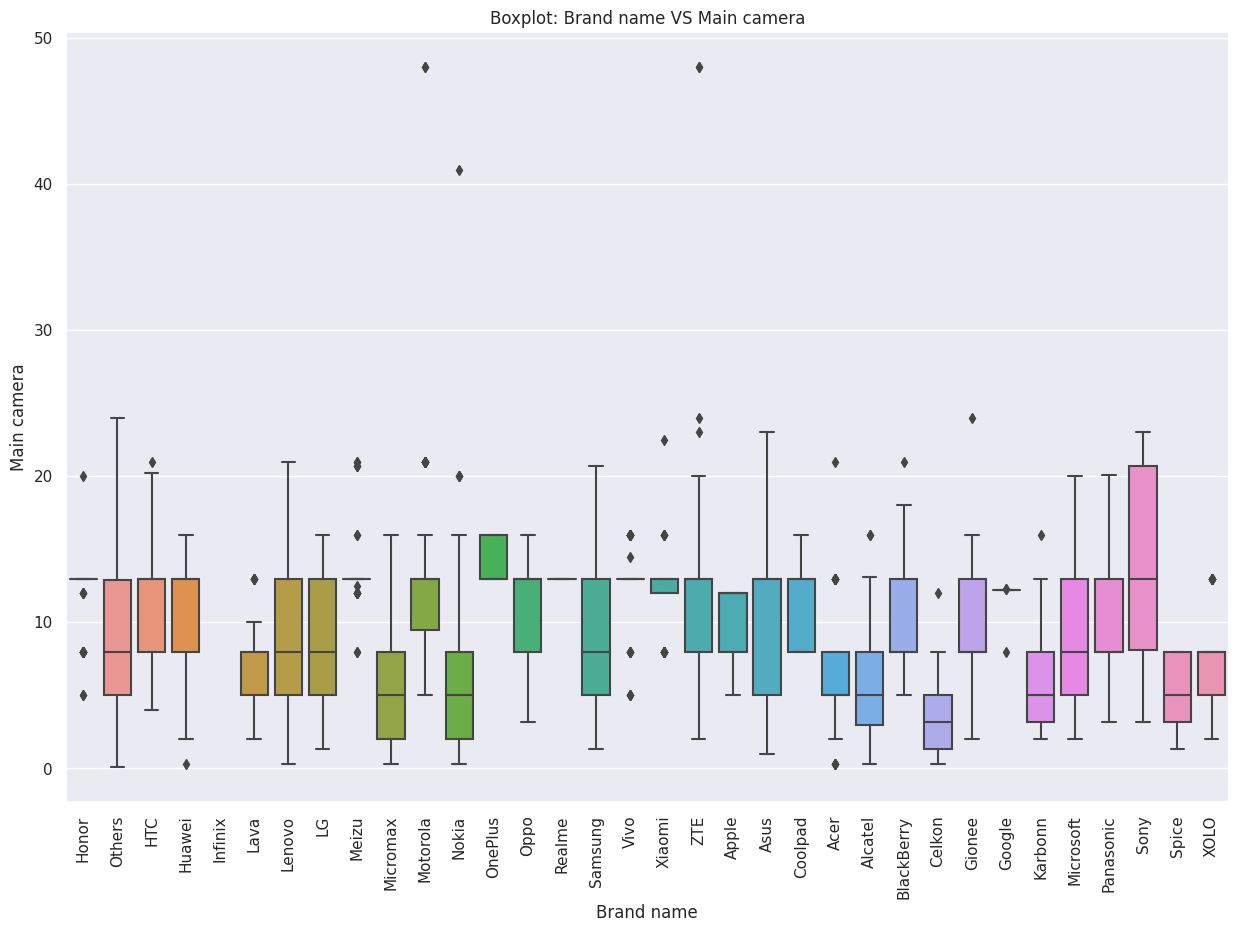

In [ ]:
# Explore the distribution of Brand name vs Main camera using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'main_camera_mp')
plt.title('Boxplot: Brand name VS Main camera')
plt.xlabel('Brand name')
plt.ylabel('Main camera')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are many outliers in the distribution
* On average, Sony devices have more main camera size than other brands

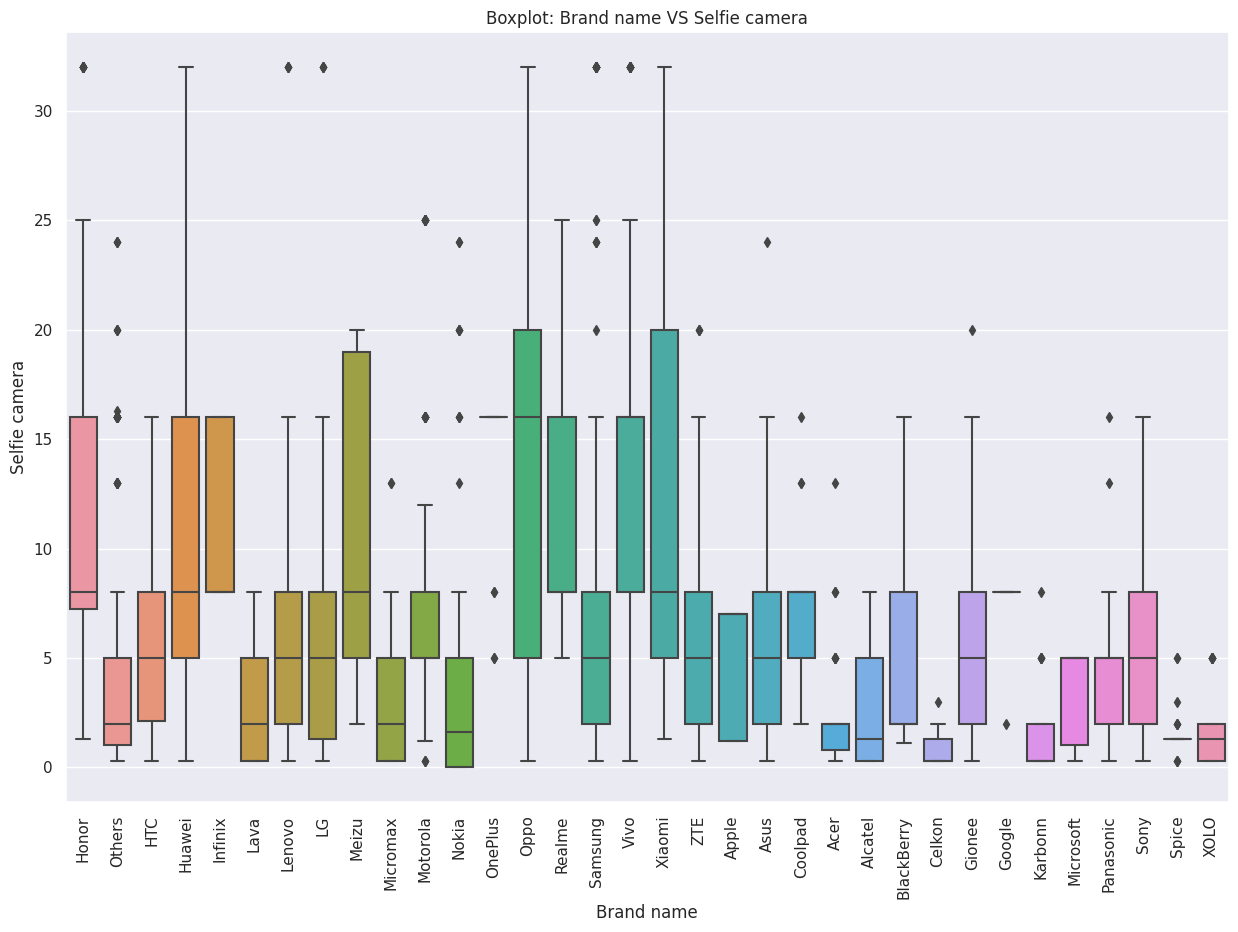

In [ ]:
# Explore the distribution of Brand name vs Selfie camera using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'selfie_camera_mp')
plt.title('Boxplot: Brand name VS Selfie camera')
plt.xlabel('Brand name')
plt.ylabel('Selfie camera')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are many outliers in the distribution.
* On average, Oppo devices have more selfie camera quality than other brands.

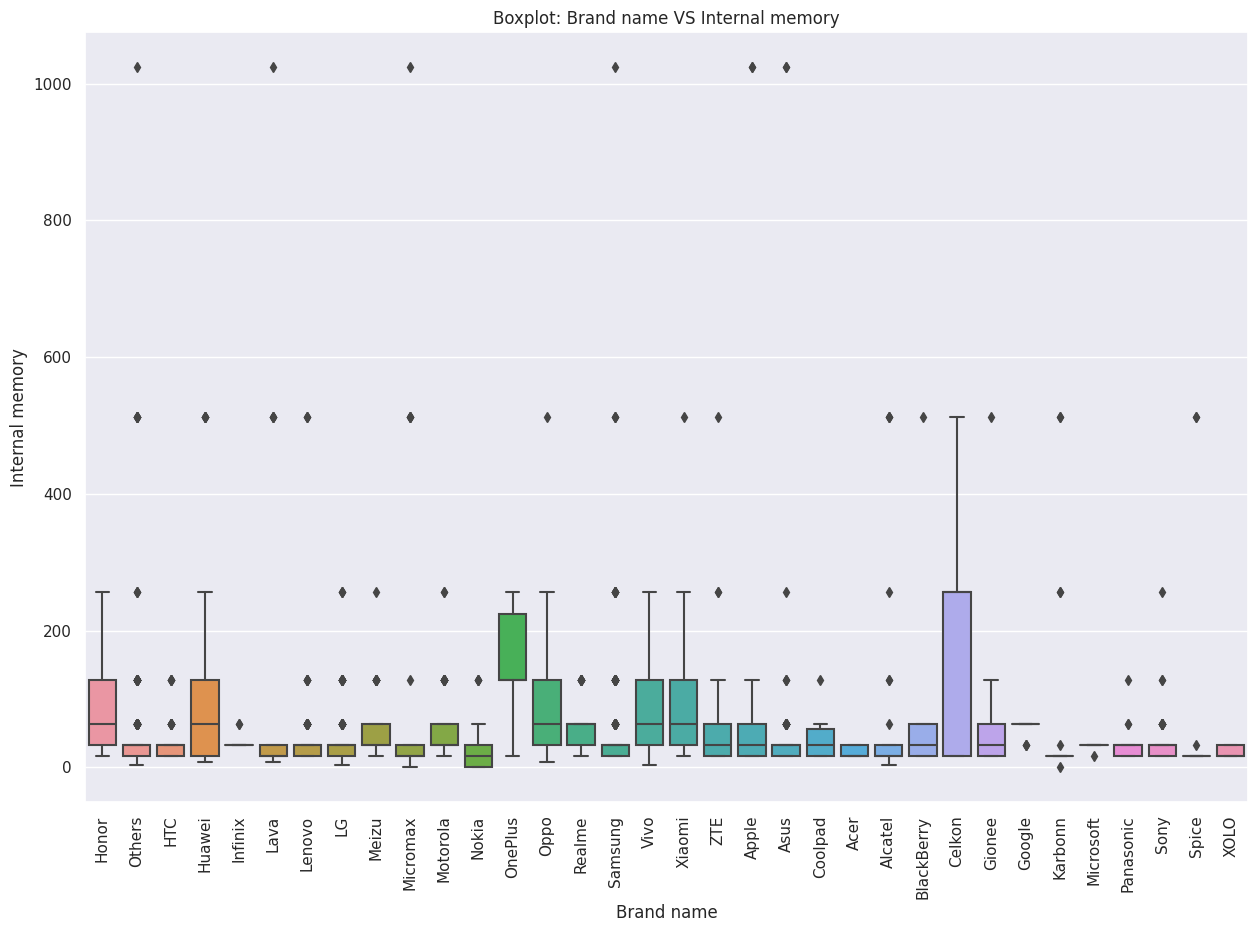

In [ ]:
# Explore the distribution of Brand name vs Internal memory using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'int_memory')
plt.title('Boxplot: Brand name VS Internal memory')
plt.xlabel('Brand name')
plt.ylabel('Internal memory')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are many outliers in the distribution and some brands seem to have internal memory sizes that are greater than 1000GB.
* Devices with higher internal memory can mostly be found in Celkon brand.

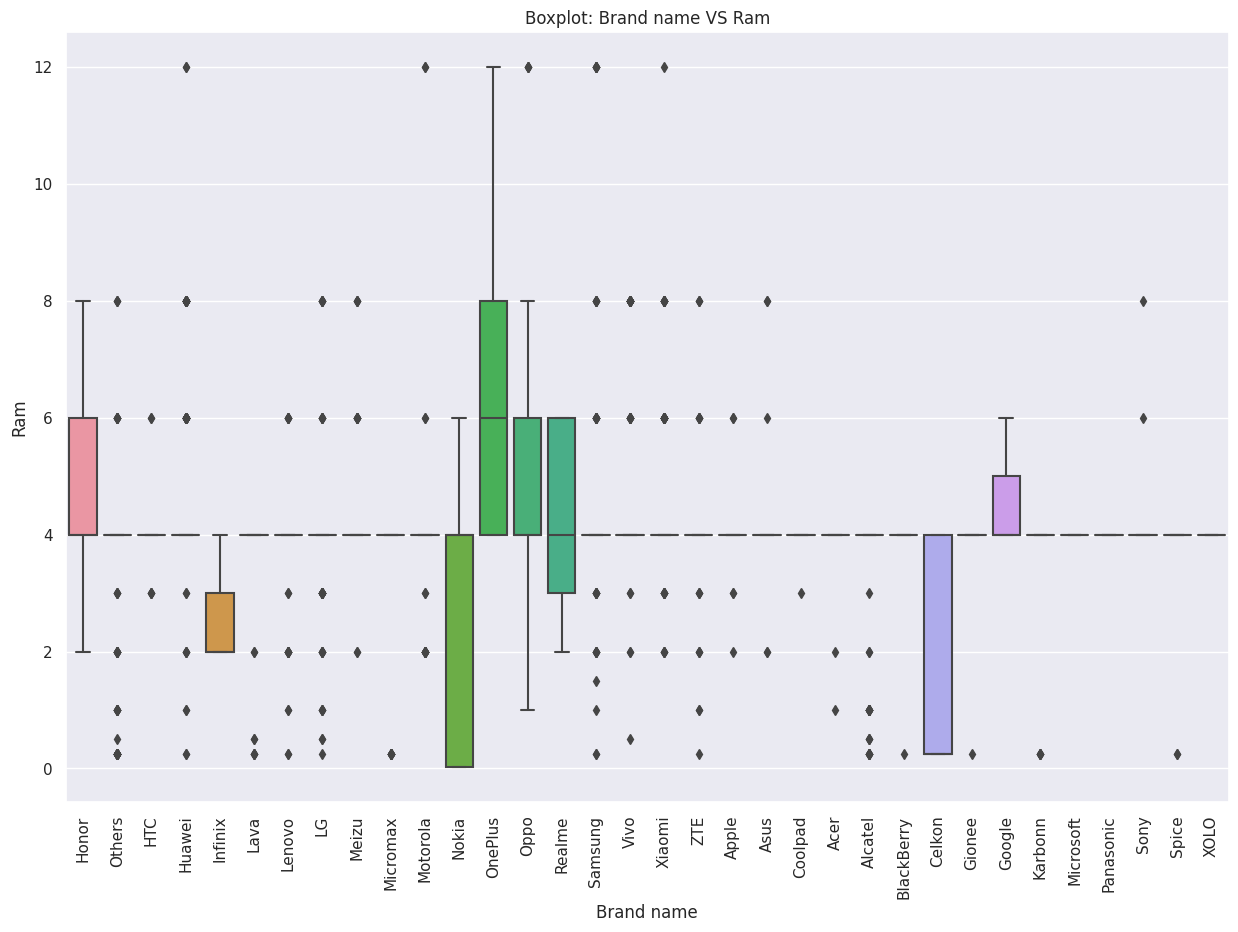

In [ ]:
# Explore the distribution of Brand name vs Ram using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'ram')
plt.title('Boxplot: Brand name VS Ram')
plt.xlabel('Brand name')
plt.ylabel('Ram')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are amny outliers in the distribution.
* OnePlus brand has more devices with higher ram than other brands.

**Question N0.3**

3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

**Answer**

Generally OnePlus devices have higher ram size when compared to other brands. They have minimum of 4GB RAM size and maximum of 12GB RAM size.

Infinix and Celkon brand have maximum of 4GB RAM size and approximately 75% of Nokia brand have maximum of 4GB RAM size



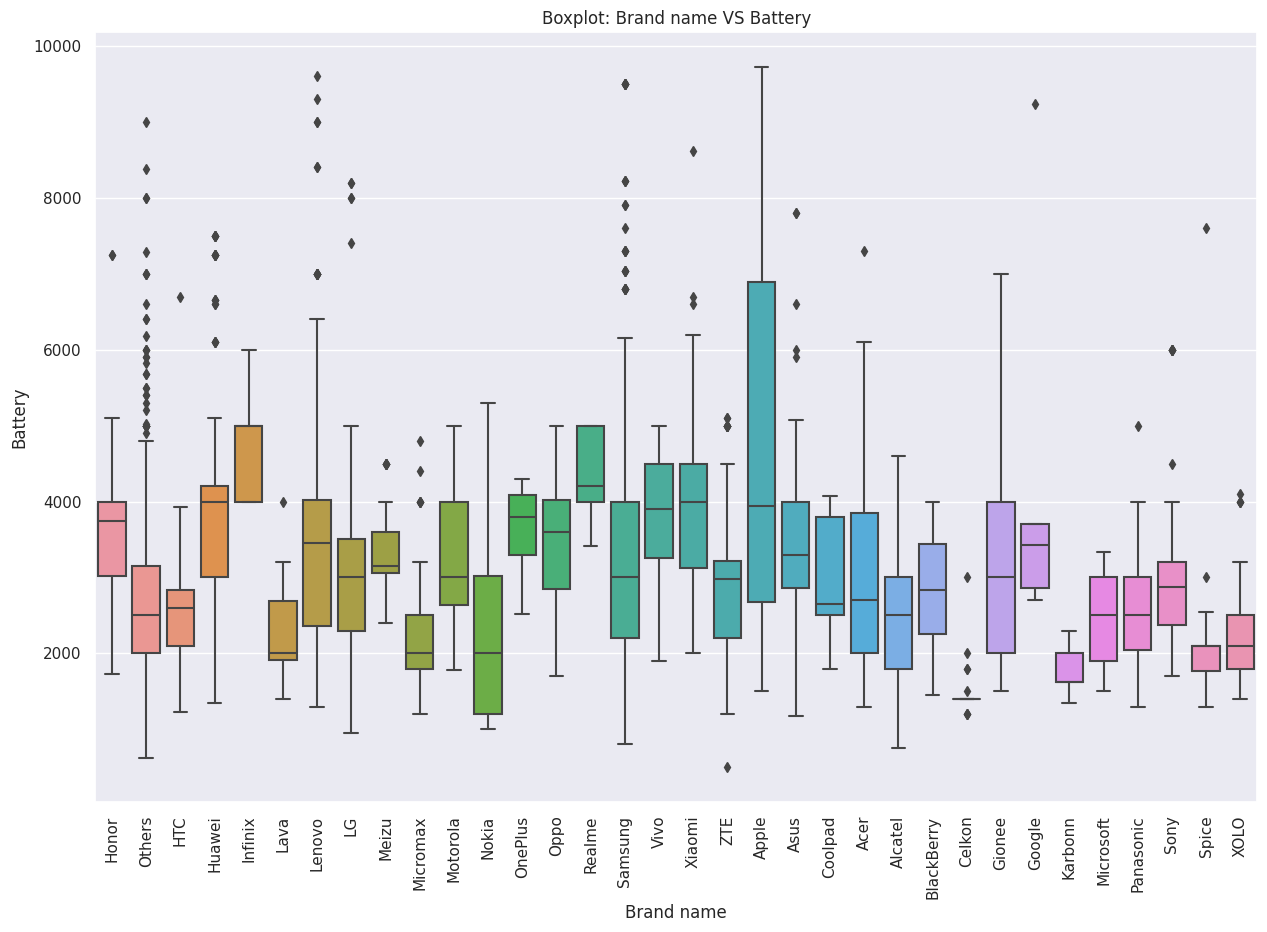

In [ ]:
# Explore the distribution of 4G VS Battery using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'battery')
plt.title('Boxplot: Brand name VS Battery')
plt.xlabel('Brand name')
plt.ylabel('Battery')
plt.xticks( rotation = 90)
plt.show()

###Observations.

* Apple has more devices with larger battery sizes than other brands.

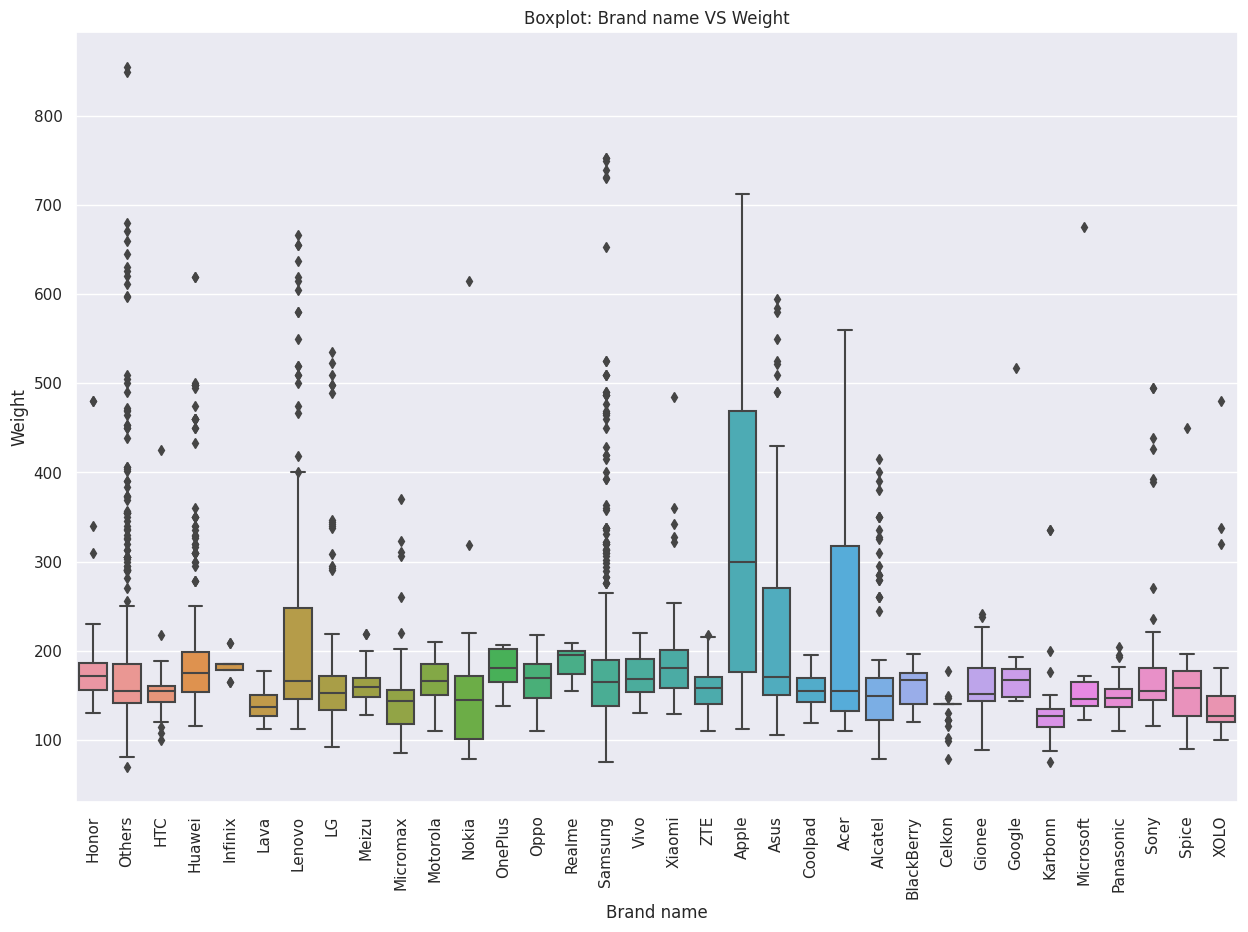

In [ ]:
# Explore the distribution of 4G VS Weight using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'weight')
plt.title('Boxplot: Brand name VS Weight')
plt.xlabel('Brand name')
plt.ylabel('Weight')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are amny outliers in the distribution.
* On average, Apple devices weigh more than other brands

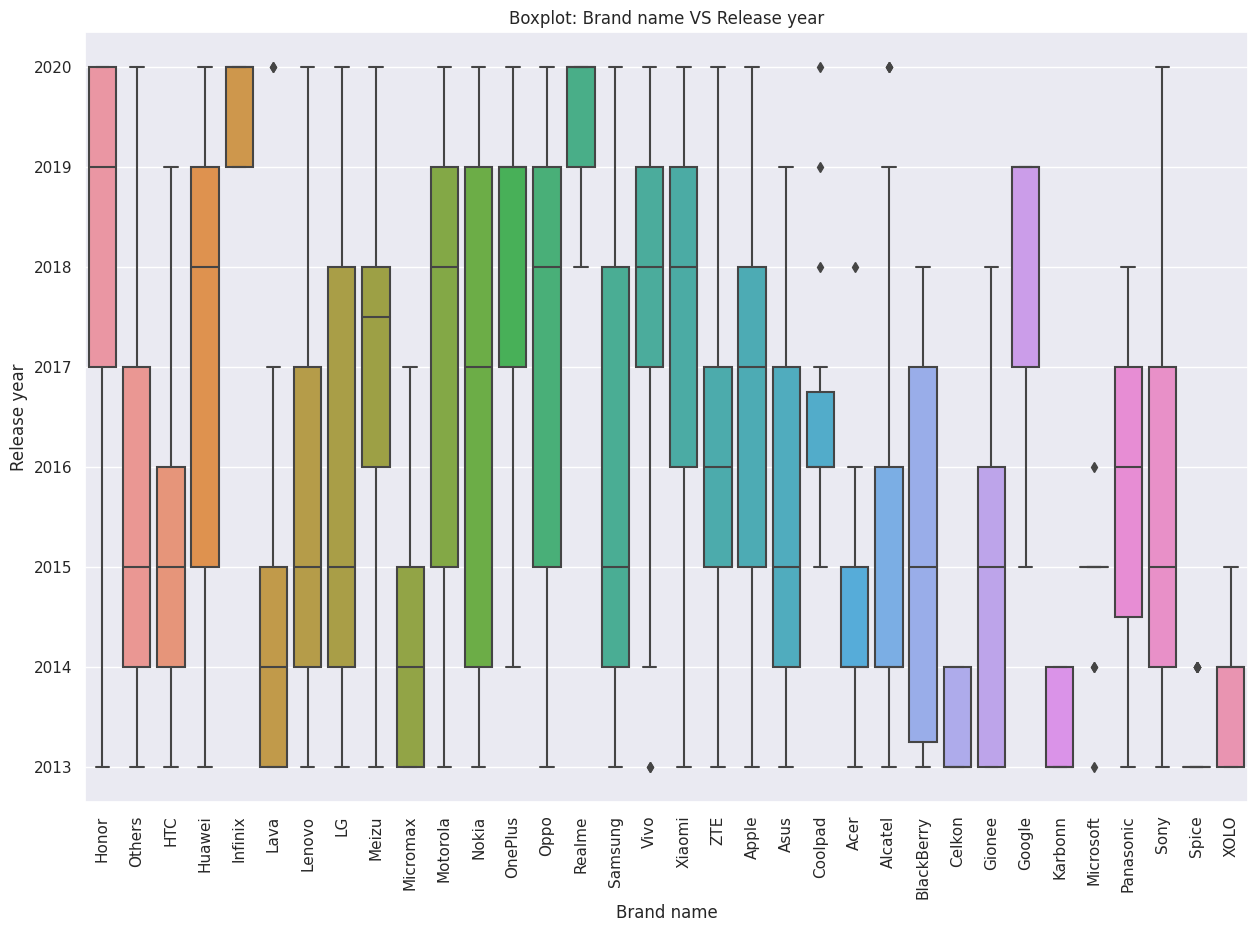

In [ ]:
# Explore the distribution of 4G VS Release year using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'release_year')
plt.title('Boxplot: Brand name VS Release year')
plt.xlabel('Brand name')
plt.ylabel('Release year')
plt.xticks( rotation = 90)
plt.show()

###Observations.



###Observations

* Infinix is the newest brand in the market. It was first released in 2019, followed by Realme which was first released in 2018.

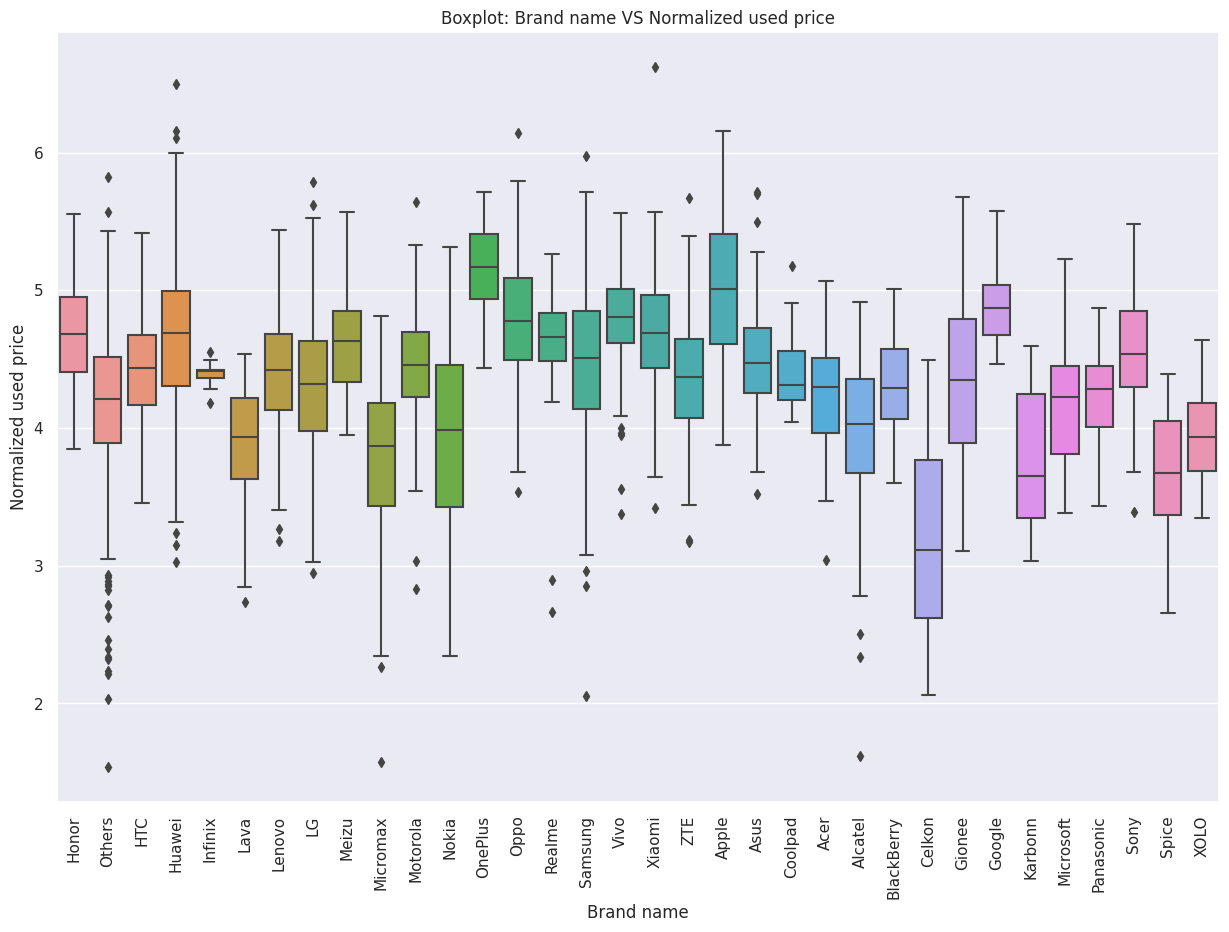

In [ ]:
# Explore the distribution of Brand name VS Normalized used price using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'normalized_used_price')
plt.title('Boxplot: Brand name VS Normalized used price')
plt.xlabel('Brand name')
plt.ylabel('Normalized used price')
plt.xticks( rotation = 90)
plt.show()

###Observations

* There are many outliers in the distribution.
* Apple has the highest average normalized used prize while Celkon is the lowest.

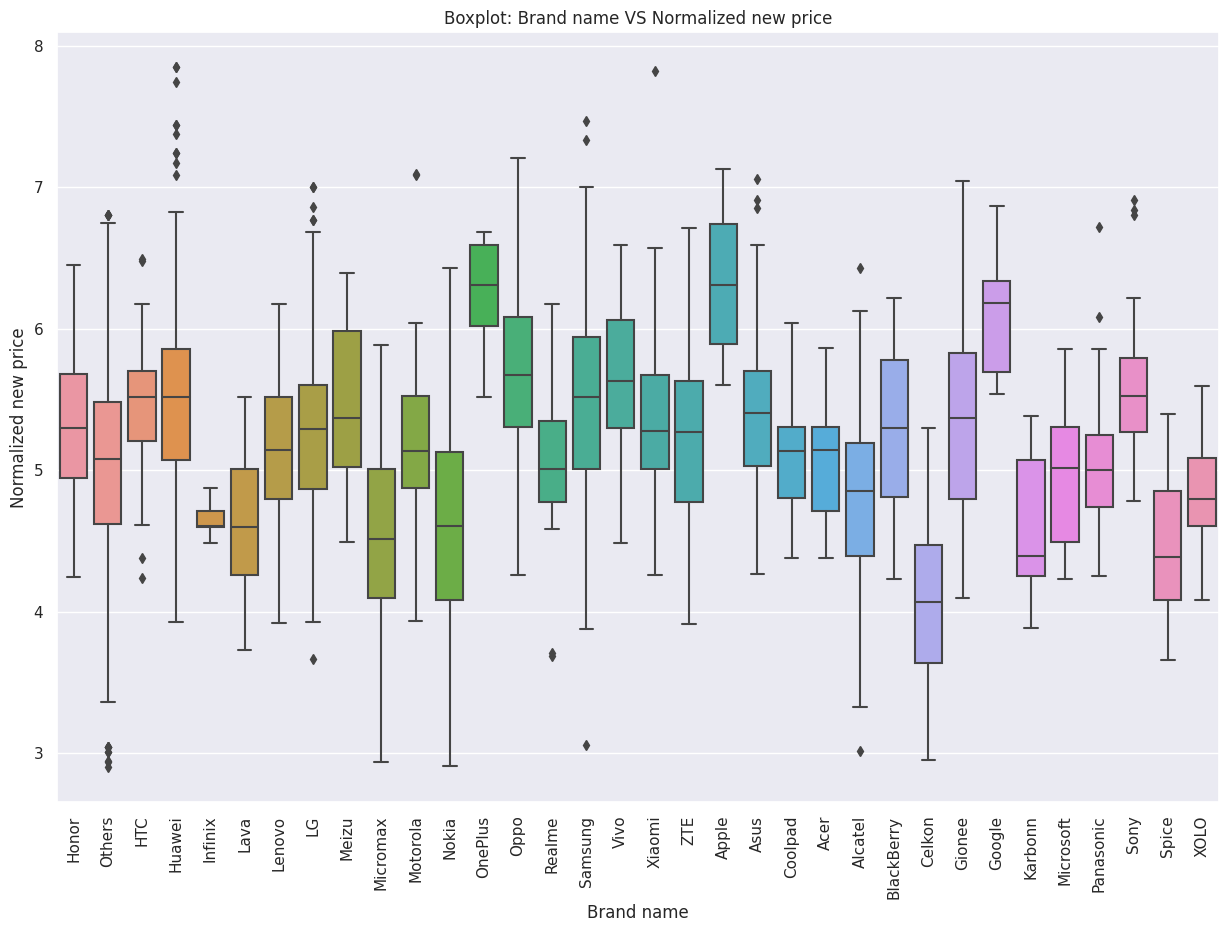

In [ ]:
# Explore the distribution of Brand name VS Normalized new price using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'brand_name', y = 'normalized_new_price')
plt.title('Boxplot: Brand name VS Normalized new price')
plt.xlabel('Brand name')
plt.ylabel('Normalized new price')
plt.xticks( rotation = 90)
plt.show()

###Observations

* Apple has the highest average normalized new prize while Celkon is the lowest.

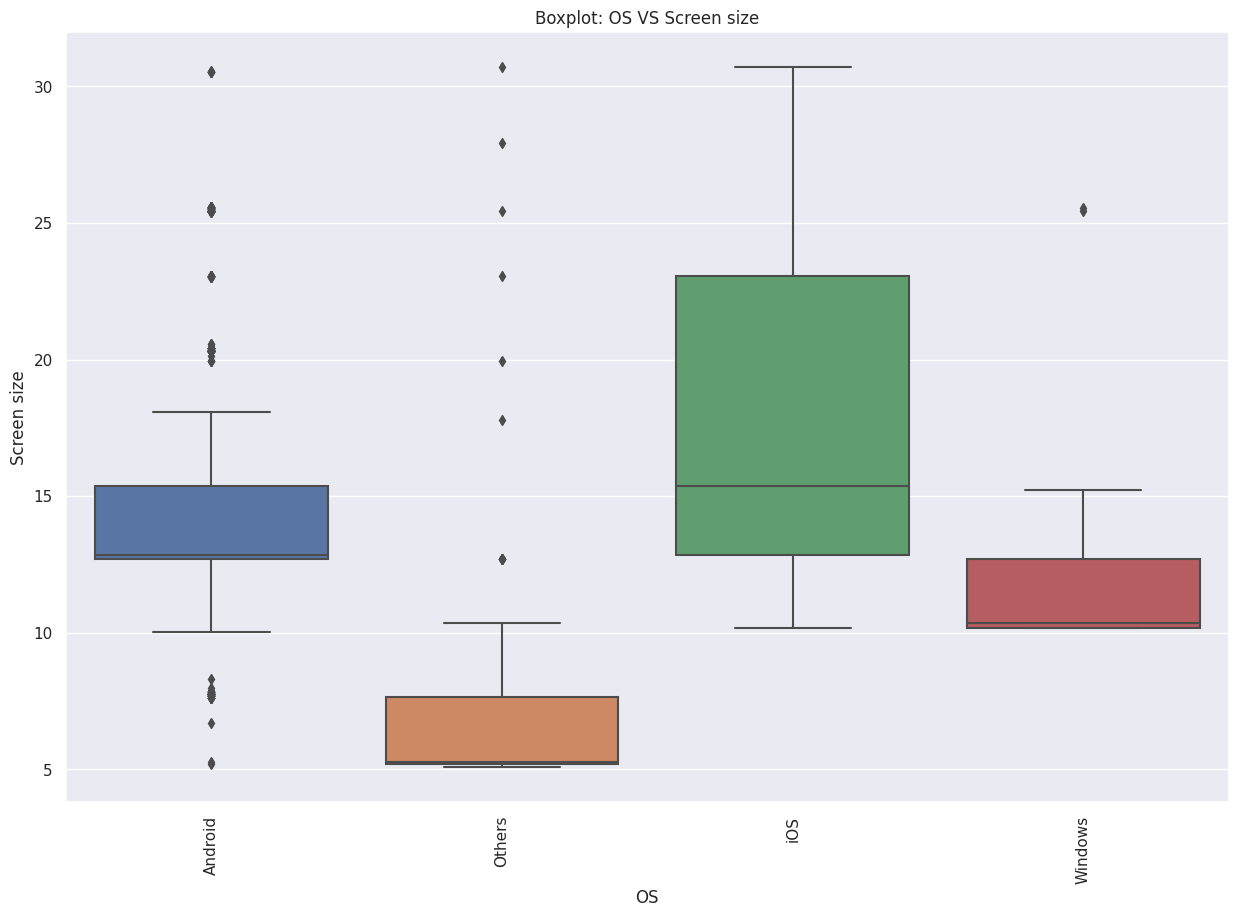

In [ ]:
# Explore the distribution of OS vs Screen size using boxplot
plt.figure(figsize = (15,10) )
sns.boxplot(data = df, x = 'os', y = 'screen_size')
plt.title('Boxplot: OS VS Screen size')
plt.xlabel('OS')
plt.ylabel('Screen size')
plt.xticks( rotation = 90)
plt.show()

###Observations

* iOS offers higher average screen size than other OS

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
# check for the missing values
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Fixing the missing value in the data

In [ ]:
# create a copy of the data
df4 = df.copy()
# check for the missing values
df4.isnull().sum()


brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
# Treat the missing value in main camera column using groupby the brand name and normalized used price(considering variables with higher correlations)
grouped_df = df4.groupby(['brand_name', 'normalized_used_price'])

# Find the median main camera mp for each group (use median because of outliers)
median_main_camera_mp = grouped_df['main_camera_mp'].median().reset_index()

# Fill the missing values in the 'main_camera_mp' column using the median values
df4['main_camera_mp'].fillna(median_main_camera_mp['main_camera_mp'], inplace=True)
df4.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           3
selfie_camera_mp         2
int_memory               4
ram                      4
battery                  6
weight                   7
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
# write the function to fill the missing values for selfie camera, internal memory, ram, battery, weight
def fill_missing_values(df, column_name):
    """
    Fills missing values in the specified column of the given DataFrame.
    """
    grouped_df = df.groupby(['brand_name', 'normalized_used_price'])
    median_values = grouped_df[column_name].median().reset_index()
    df[column_name].fillna(median_values[column_name], inplace=True)
    return df

# Apply the function to all columns with missing values
df4 = fill_missing_values(df4, 'selfie_camera_mp')      # fill the missing values for selfie camera
df4 = fill_missing_values(df4, 'int_memory')            # fill the missing values for internal memory
df4 = fill_missing_values(df4, 'ram')                   # fill the missing values ram
df4 = fill_missing_values(df4, 'battery')               # fill the missing values battery
df4 = fill_missing_values(df4, 'weight')                # fill the missing values weight


In [ ]:
# check the remaining missing values
df4.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           3
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
# Treat the remaining missing value in main camera column using groupby the brand name and normalized new price
grouped_df_1 = df4.groupby(['brand_name', 'normalized_new_price'])

# Find the median main camera mp for each group (use median because of outliers)
median_main_camera_mp = grouped_df_1['main_camera_mp'].median().reset_index()

# Fill the missing values in the 'main_camera_mp' column using the median values
df4['main_camera_mp'].fillna(median_main_camera_mp['main_camera_mp'], inplace=True)
df4.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           2
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [ ]:
# check for missing values in the 'main_camera_mp' column
missing_values = df4['main_camera_mp'].isnull().sum()

# If there are missing values, fill them with the median
if missing_values > 0:
    # Group the DataFrame by brand name
    grouped_by_brand = df4.groupby('brand_name')

    # Calculate median main camera mp for each group
    median_main_camera_mp = grouped_by_brand['main_camera_mp'].median()

    # Fill missing values in the 'main_camera_mp' column using the median values
    for idx, row in df4.iterrows():
        if pd.isna(row['main_camera_mp']):
            brand_name = row['brand_name']
            median_value = median_main_camera_mp[brand_name]

            df4.loc[idx, 'main_camera_mp'] = median_value


In [ ]:
df4.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
# compare the heatmap of the dataset with missing values and heatmap of the dataset without missing values
# create a list of numerical columns
num_cols_1 = df4.select_dtypes(include=np.number).columns.tolist()

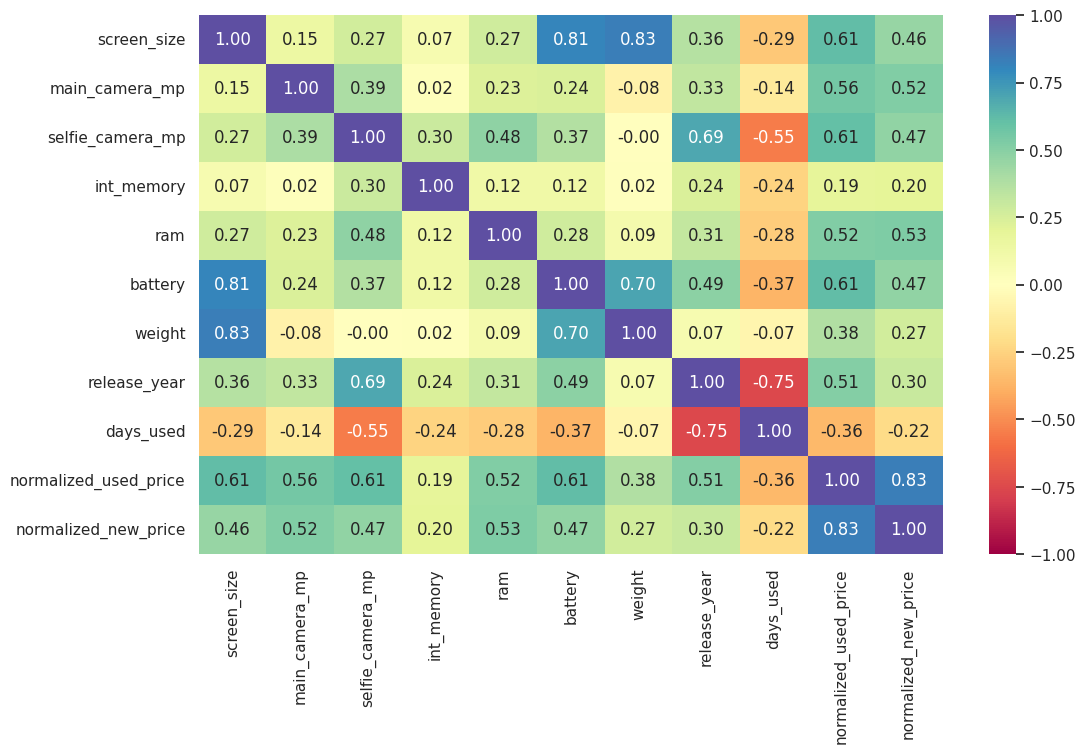

In [ ]:
# check the correlation of the numerical variables using heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(
    df4[num_cols_1].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

###Observations

* There is no noticeable difference between the heatmap of the previous dataset and the heatmap of the current dataset.

* All the missing values have been treated

Compare <a href = #link1>data with missing values</a>

In [ ]:
# explore the data after filling the missing values
# create code to explore univariate data using both boxplot and histplot
def boxplot_histplot(column_name):
    """
    Boxplot and histogram combined to explore univariate analysis

    column_name: dataframe column which contains the variable to be analyzed
    figsize: size of figure (default (15,10))
    """

    # Create boxplot
    plt.figure(figsize = (15,10) )
    sns.boxplot(
        data = df4,
        x = column_name,
        showmeans = True,
    )
    plt.title(f'Boxplot: {column_name}')
    plt.xlabel(f'{column_name}')
    plt.show()

    # Create histogram
    plt.figure(figsize = (15,10) )
    plt.title(f'Histogram: {column_name}')
    plt.xlabel(f'{column_name}')
    sns.histplot(data = df4, x = column_name)
    mean = df4[column_name].mean()
    median = df4[column_name].median()
    plt.axvline(x=mean, color='red', linestyle='--', label='Mean')
    plt.axvline(x=median, color='green', linestyle='--', label='Median')
    plt.show()

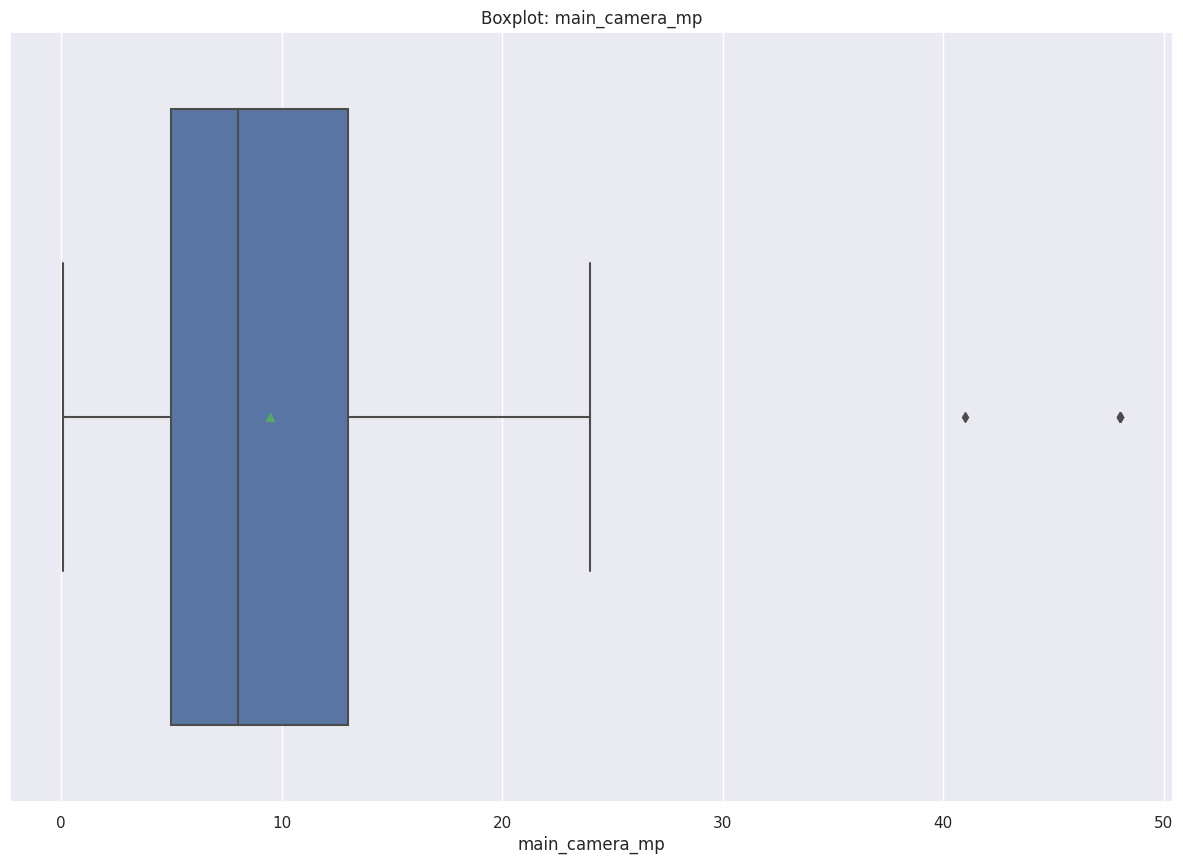

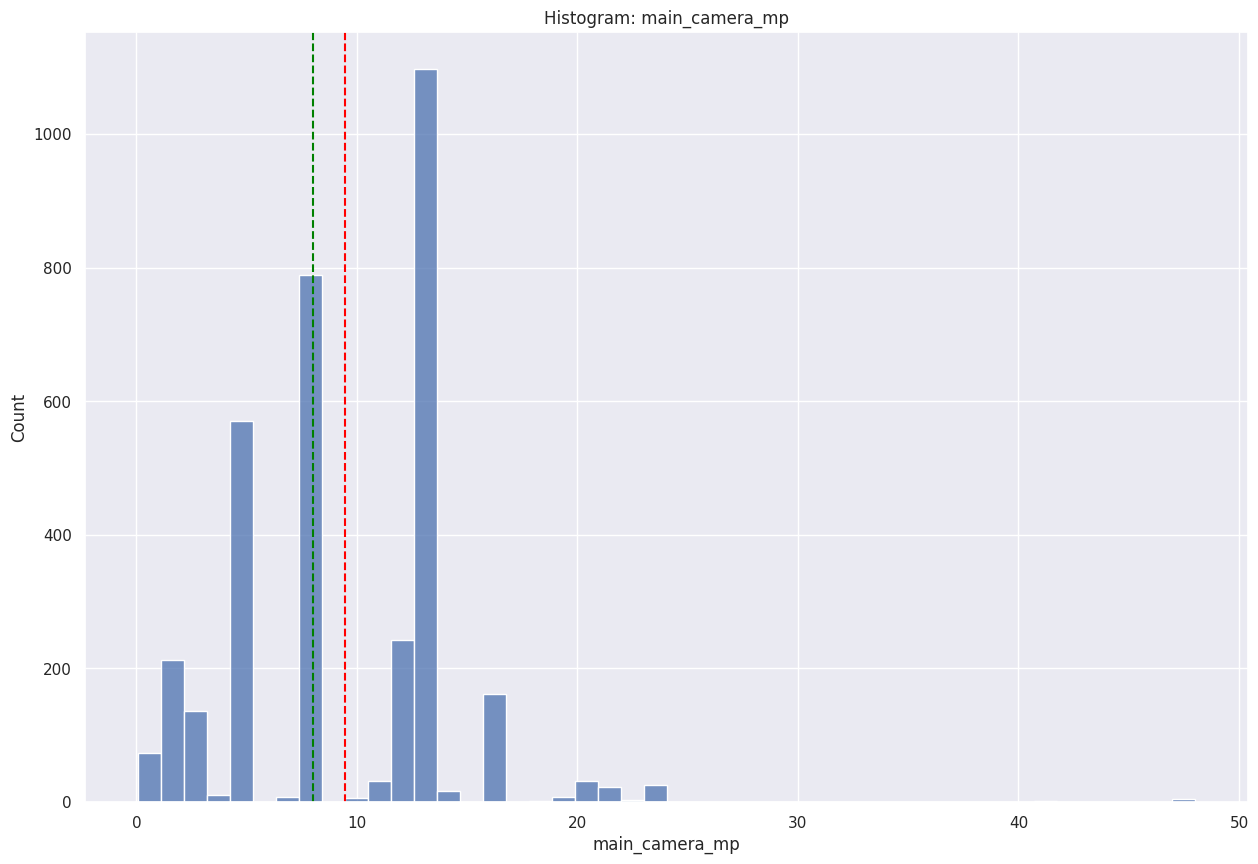

In [ ]:
column_name = 'main_camera_mp'
boxplot_histplot('main_camera_mp')

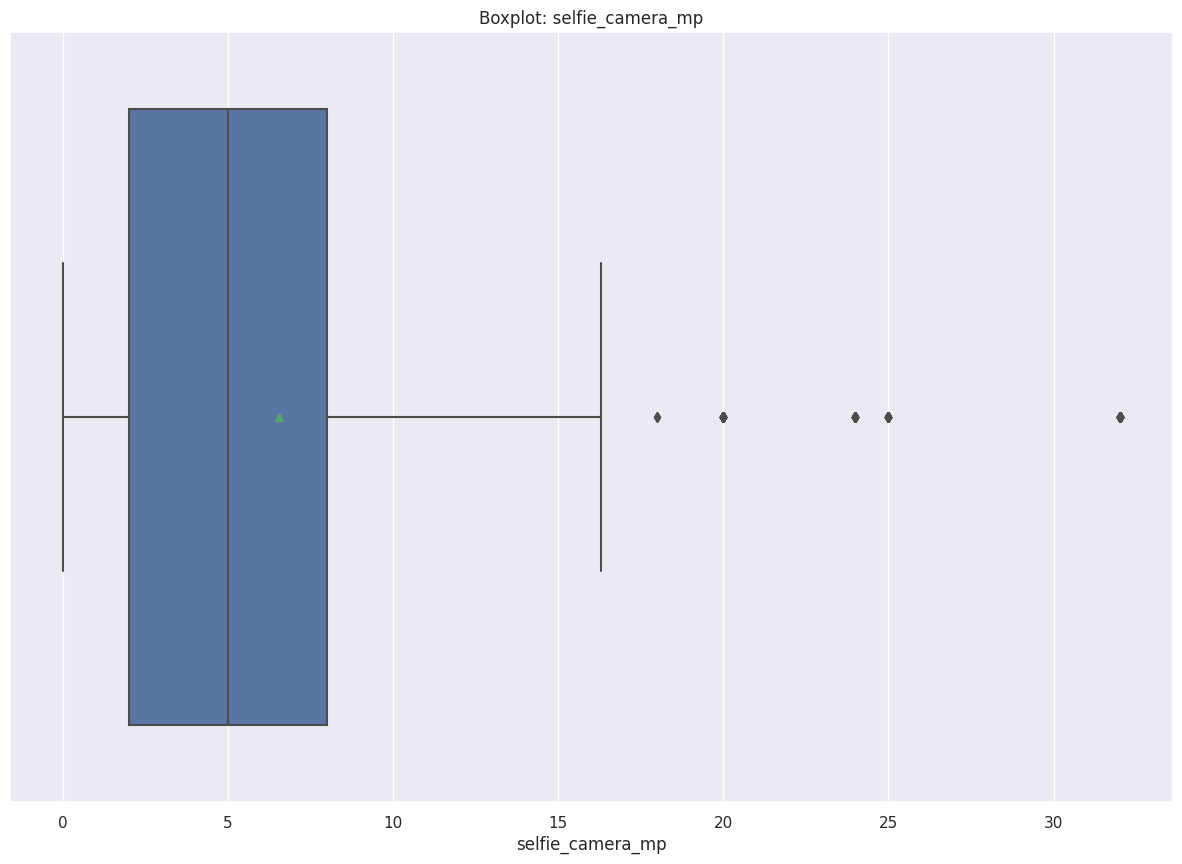

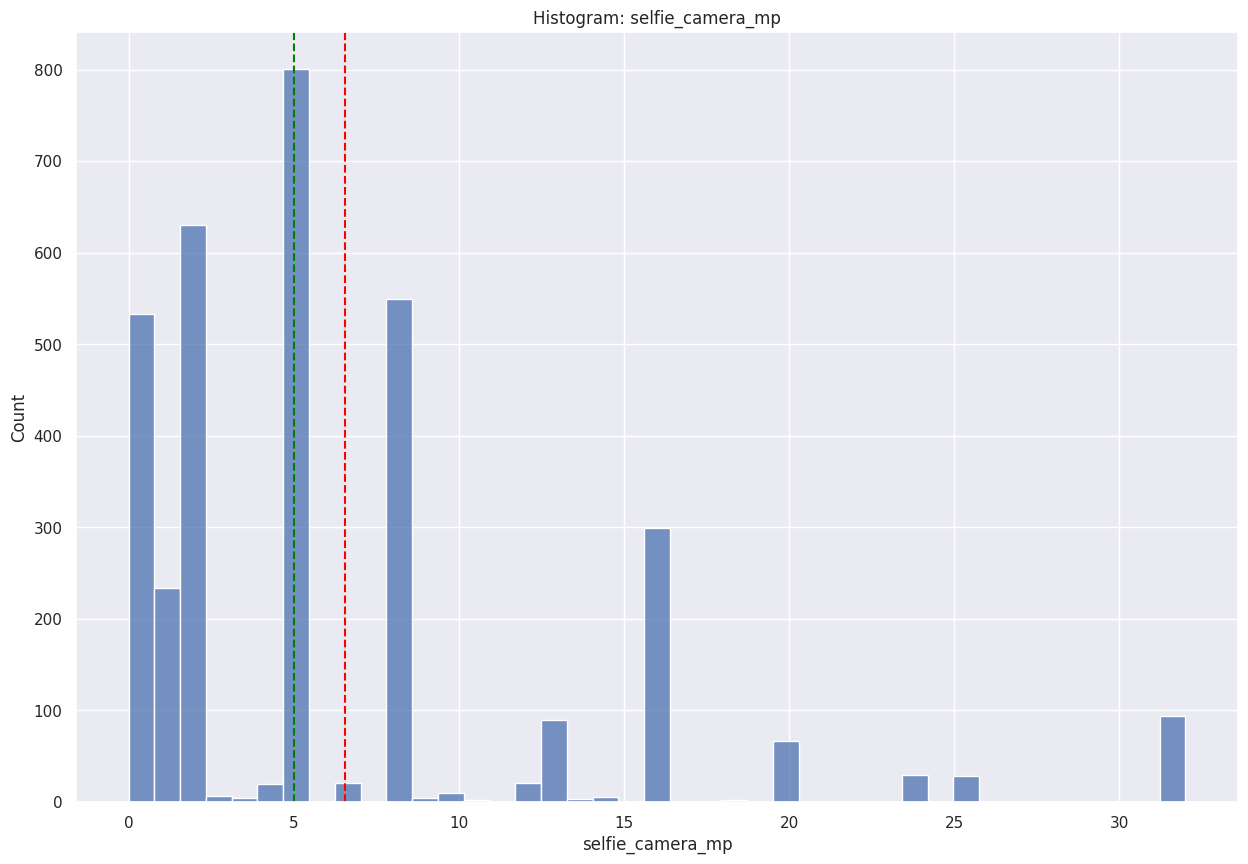

In [ ]:

column_name = 'selfie_camera_mp'
boxplot_histplot('selfie_camera_mp')

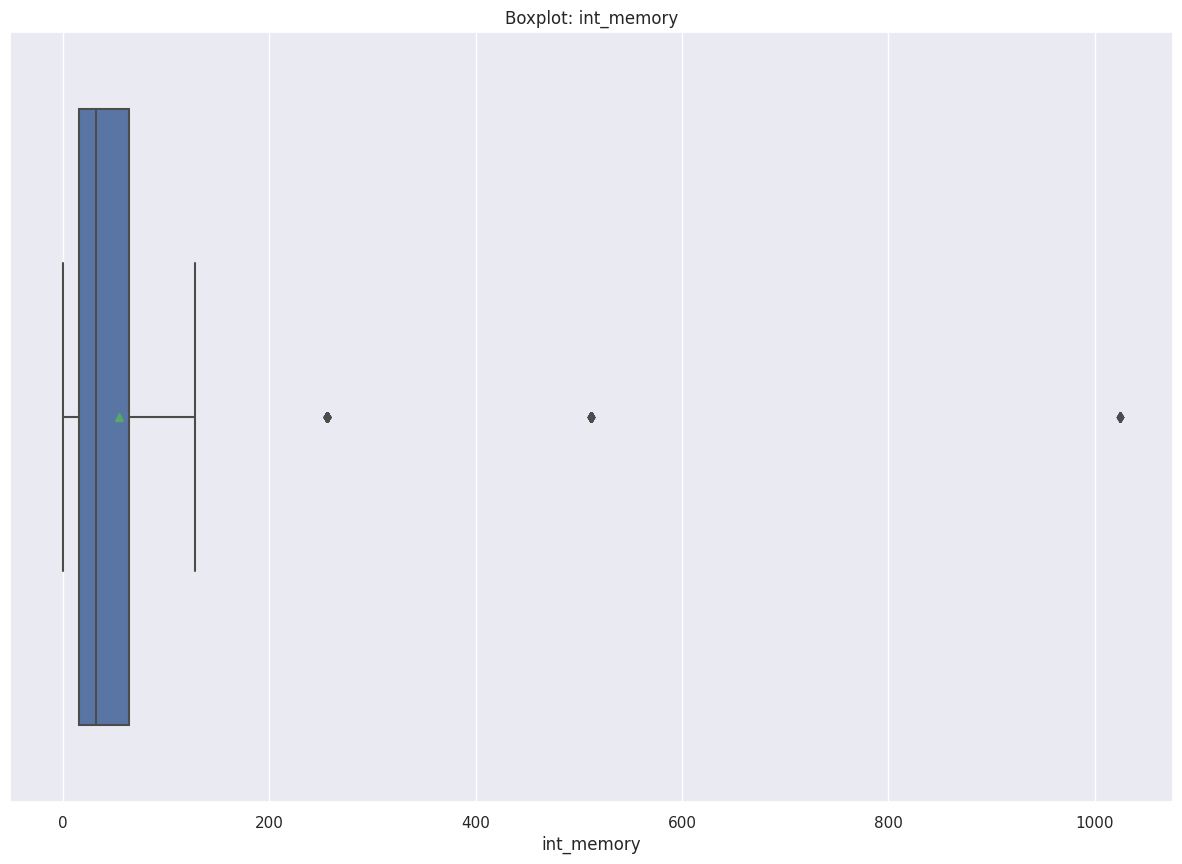

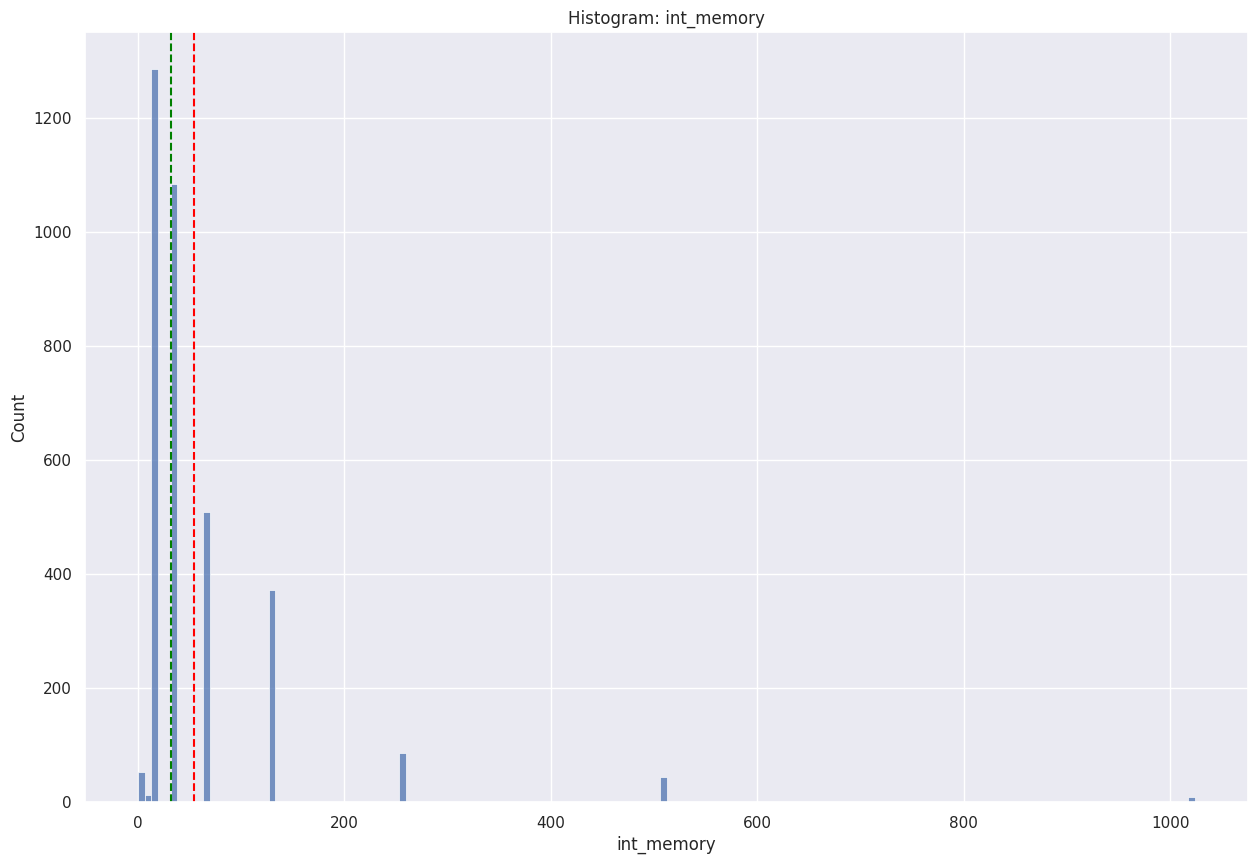

In [ ]:
column_name = 'int_memory'
boxplot_histplot('int_memory')

## Data Preparation for Modelling

* To predict the price of a used phone/tablet and identify factors that significantly influence it.

* Encode the categorical features.

* Split the data into train and test,.

* Build a Linear Regression model using the train data and then check it's performance

In [ ]:
# defining X and y variables
X = df4.drop(['normalized_used_price'], axis=1)
y = df4['normalized_used_price']

print(X.head())

print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# create dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# split the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# check the number of rows in both train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
# check the ordinary least square summary
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                           23:50:00   Log-Likelihood:                 124.23
No. Observations:                   2417   AIC:                            -150.5
Df Residuals:                       2368   BIC:                             133.3
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


##Model Interpretation

* The adjusted R-squared is 0.842 which indicates a good fit model.

* The constant coefficient is -47.6580, which is the output if all the predictor variables' coefficient are equal to zero. It is the Y-intercept.

## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# check model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229848,0.180567,0.844934,0.841724,4.331008


In [ ]:
# check model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239021,0.184871,0.841601,0.833738,4.507869


###Observations

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict normalized used price within a mean error of 0.18 on the test data

- MAPE of 4.5 on the test data means that we are able to predict within 4.5% of the normalized used price

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Check the following Linear Regression assumptions:

1. No Multicollinearity

2. Linearity of variables

3. Independence of error terms

4. Normality of error terms

5. No Heteroscedasticity

##Test for Multicollinearity using VIF

**General Rule of thumb**:
* If VIF is between 1 and 5, then there is low multicollinearity.
* If VIF is between 5 and 10, we say there is moderate multicollinearity.  
* If VIF is exceeding 10, it shows signs of high multicollinearity.

In [ ]:
# define a function to check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,3.781773e+06
1,screen_size,7.675613e+00
2,main_camera_mp,2.110289e+00
3,selfie_camera_mp,2.806298e+00
4,int_memory,1.361101e+00
5,ram,2.255102e+00
6,battery,4.064487e+00
7,weight,6.361301e+00
8,release_year,4.886457e+00
9,days_used,2.662706e+00


###Observations

* The screen size and weight columns have VIF greater than 5, apart from the constant and dummy variables.

###Actions

* Let's systematically drop columns with multicollinearity greater than 5.

* Let's ignore the dummy columns and the constant.

In [ ]:
# function to treat multicollinearity
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# check the variable to drop
col_list = ['screen_size', 'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838358,0.234720
1,weight,0.838304,0.234759


In [ ]:
# let's drop the screen size
col_to_drop = 'screen_size'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,3.653429e+06
1,main_camera_mp,2.108291e+00
2,selfie_camera_mp,2.802691e+00
3,int_memory,1.358908e+00
4,ram,2.255102e+00
5,battery,3.826630e+00
6,weight,2.971799e+00
7,release_year,4.716379e+00
8,days_used,2.651205e+00
9,normalized_new_price,3.049621e+00


* Multicollinearity has been treated.

In [ ]:
# rebuild a regression model with the updated predictor variables
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.6
Date:                   Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                           23:53:08   Log-Likelihood:                 97.777
No. Observations:                   2417   AIC:                            -99.55
Df Residuals:                       2369   BIC:                             178.4
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


###Observations.

* Adj. R-Squared has dropped from 0.842 to 0.838 which shows that the dropped column has no much effect on the model.

Next step is to look at the p-value of the predicator variables to check for significance. The p-value should be less than 0.05

In [ ]:
# select and remove the columns with p-value > 0.05
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'release_year', 'normalized_new_price', 'brand_name_Infinix', 'brand_name_Karbonn', 'brand_name_Lenovo', 'brand_name_Xiaomi', 'os_Others', '4g_yes']


In [ ]:
# create updated train and test data
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
# rerun the regression model with updated data
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1041.
Date:                   Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                           23:54:03   Log-Likelihood:                 76.078
No. Observations:                   2417   AIC:                            -126.2
Df Residuals:                       2404   BIC:                            -50.88
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# check the model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234473,0.183832,0.838631,0.837758,4.419027


In [ ]:
# check the model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.242778,0.187688,0.836583,0.834506,4.584921


###Observations.

* No feature has p-value > 0.05.
* The Adj. R-Squared is 0.838, which is the same with the Adj. R-squared in olsmod1. It shows that the dropped variables were not affecting the model.
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

###Test for Linearity and Independence

In [ ]:
# create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.858979,0.228508
1525,4.448399,4.637933,-0.189533
1128,4.315353,4.274479,0.040874
3003,4.282068,4.285269,-0.003201
2907,4.456438,4.484637,-0.028199


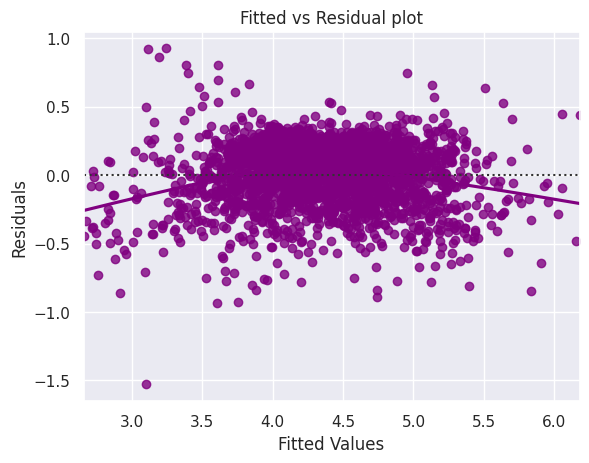

In [ ]:
# plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

###Observation.

* There is no pattern in the plot above, hence the assumptions of linearity and independence are satisfied.

###Test for Normality



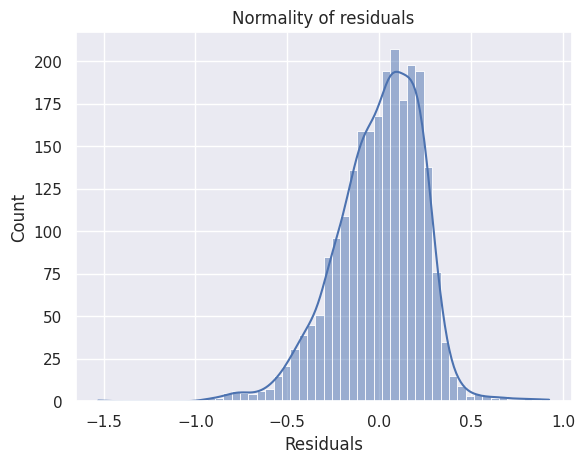

In [ ]:
# use the histogram plot to check for normality
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

###Observation

* The shape of the histogram is almost symmetrical, hence it follows normal distribution.

* Hence, the assumption for normality and independence is satisfied.

###Test for Heteroscedasticity

In [ ]:
# test for heteroscedasticity using Goldfeldquandt test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0019123555407448), ('p-value', 0.4868251758792503)]

###Observation

* The p-value > 0.05, hence the residual can be said to be Homoscedastic

* Hence, this assumption is satisfied.

###Prediction on the test data


In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.372177
2341,3.696103,3.994460
1913,3.592093,3.638823
688,4.306495,4.092721
650,4.522115,5.180256
2291,4.259294,4.384516
40,4.997685,5.430274
1884,3.875359,4.044055
2538,4.206631,4.062631
45,5.380450,5.274016


###Observations

* The actual and the predicted values are comparable.

## Final Model

In [ ]:
# create a dataset for the final model
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
# get the final regression model
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     1041.
Date:                   Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                           23:57:17   Log-Likelihood:                 76.078
No. Observations:                   2417   AIC:                            -126.2
Df Residuals:                       2404   BIC:                            -50.88
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# check the model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.234473,0.183832,0.838631,0.837758,4.419027


In [ ]:
# check the model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.242778,0.187688,0.836583,0.834506,4.584921


___